### Student Information

Name: 沈 毓 真

Student ID: 110061549

GitHub ID: #147044413

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# Part 1

In [1]:
### >>> Exercise 2 (take home):
### -----------------------------------------------------
print("\033[1;34;43m Part 1. Exercise 2 \033[0m")

# define the categories we want
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the provided categories
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories,
                                  shuffle=True,
                                  random_state=42)

# import some using packages
import pandas as pd
import sys
sys.path.append('..') # for finding "helpers" folder from the last layer

# use the functions provided by this homework
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train)) # "apply" function: because "category_name" depends on "category" 

# copy the original data X as another variable that will not be reflected in the original
X_copy = X.copy()
print("\033[1;34m\n* The original data \033[0m")
display(X)

# change the subset of 'category' and 'category_name' column
X_copy[['category', 'category_name']] = X_copy[['category_name', 'category']]
print("\033[1;34m\n* The data after changing the subset \033[0m")
display(X_copy)

# find the amount of the data with different category
print("\033[1;34m\n* The amount of the data with different category \033[0m")
for t in categories:
    print("{}: \t#{}".format(t, sum(X.loc[:, 'category_name']==t)))
print("\033[1;31m>>> Then we can observe whether the data of each category are balanced. \033[0m")

# only find the data that we want
print("\033[1;34m\n* The data that we only want \033[0m")
criterion = X['text'].map(lambda x: x.startswith('From: Dan Wallach'))
display(X[criterion])
print("\033[1;31m>>> Then we can only find out the text which are from Dan Wallach. \033[0m")

 Part 1. Exercise 2 

* The original data 


text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]


* The data after changing the subset 


text  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...   
...                                                 ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...   

                    category  category_name  
0              comp.graphics              1  
1              comp.graphics              1  
2     soc.religion.christian              3  
3     soc.religion.christian              3  
4     soc.religion.christian              3  
...                      ...            ...  
2252                 sci.med              2  
2253                 sci.med              2  
2254                 sci.med              2  
2255                 sci.med              2  
2256                 sci.med              2  

[2257 rows x 3 columns]


* The amount of the data with different category 
alt.atheism: 	#480
soc.religion.christian: 	#599
comp.graphics: 	#584
sci.med: 	#594
>>> Then we can observe whether the data of each category are balanced. 

* The data that we only want 


text  category  \
716   From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
880   From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
953   From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   

     category_name  
716        sci.med  
880        sci.med  
953        sci.med  
2255       sci.med

>>> Then we can only find out the text which are from Dan Wallach. 


In [2]:
### >>> Exercise 5 (take home):
### -----------------------------------------------------
print("\033[1;34;43m Part 1. Exercise 5 \033[0m")

# create the data
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns=['id','missing_example'])
display(NA_df)

# check missing values by .isnull function
print("\033[1;34m\n* Checking missing values \033[0m")
display(NA_df['missing_example'].isnull())

# find data types of each value of "missing_example"
print("\033[1;34m\n* Data types of missing_example \033[0m")
for t in range(len(NA_df)):
    print(NA_df.loc[t, 'id'], end='\t')
    print(type(NA_df.loc[t, 'missing_example']))
    
print("\033[1;31m\n>>> According to the document, Pandas.isnull indicates whether values are missing, including NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike. \033[0m")
print("\033[1;31m\n>>> Therefore, we can find that .isnull() didn't work when the missing_example is string type, which may be recognized as the text or string content instead of null or missing values. \033[0m")

 Part 1. Exercise 5 


id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F


* Checking missing values 


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool


* Data types of missing_example 
A	<class 'float'>
B	<class 'float'>
C	<class 'str'>
D	<class 'str'>
E	<class 'NoneType'>
F	<class 'str'>

>>> According to the document, Pandas.isnull indicates whether values are missing, including NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike. 

>>> Therefore, we can find that .isnull() didn't work when the missing_example is string type, which may be recognized as the text or string content instead of null or missing values. 


In [3]:
### >>> Exercise 6 (take home):
### -----------------------------------------------------
print("\033[1;34;43m Part 1. Exercise 6 \033[0m")

# sample the data X
X_sample = X.sample(n=1000, random_state=42)
print("\033[1;34m\n* The data after sampling \033[0m")
display(X_sample)

# print out each category with its corresponded "category_name"
print("\033[1;34m\n* Categories \033[0m")
for t in categories:
    print("{}- {}".format(categories.index(t), t))

# work for original data
print("\033[1;34m\n* The shape of original data, X: \033[0m", X.shape)
for t in categories:
    amount = sum(X.loc[:, 'category_name']==t) # find the amount of each category data
    print("Category {}: #{} ({} %)".format(categories.index(t), amount, round(amount*100/len(X), 2))) # calculate the percentage to the whole data

# work for sampling data
print("\033[1;34m\n* The shape of sampling data, X_sample: \033[0m", X_sample.shape)
for t in categories:
    amount = sum(X_sample.loc[:, 'category_name']==t) # find the amount of each category data
    print("Category {}: #{} ({} %)".format(categories.index(t), amount, round(amount*100/len(X_sample), 2))) # calculate the percentage to the whole data

print("\033[1;31m\n>>> From the sampling data above, we can observe the order of the data will be shuffled after sampling. \033[0m")
print("\033[1;31m\n>>> Furthermore, we can find the percentages of each category to the whole data changed slightly after doing the sampling, which means the distribution of the categories remain relatively the same. \033[0m")

 Part 1. Exercise 6 

* The data after sampling 


text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1316  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...         3   
592   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1965  From: uad1126@tdc.dircon.co.uk (Robert Palmer)...         3   
363   From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...         1   
1893  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism  
...                      ...  
1316  soc.religion.christian  
592              alt.atheism  
1965  soc.religion.christian  
363            comp.graphics  
1893                 sci.med  

[1000 rows x 3 columns]


* Categories 
0- alt.atheism
1- soc.religion.christian
2- comp.graphics
3- sci.med

* The shape of original data, X:  (2257, 3)
Category 0: #480 (21.27 %)
Category 1: #599 (26.54 %)
Category 2: #584 (25.88 %)
Category 3: #594 (26.32 %)

* The shape of sampling data, X_sample:  (1000, 3)
Category 0: #206 (20.6 %)
Category 1: #270 (27.0 %)
Category 2: #247 (24.7 %)
Category 3: #277 (27.7 %)

>>> From the sampling data above, we can observe the order of the data will be shuffled after sampling. 

>>> Furthermore, we can find the percentages of each category to the whole data changed slightly after doing the sampling, which means the distribution of the categories remain relatively the same. 


 Part 1. Exercise 8 

* The distribution of two datasets 


X  X_sample
soc.religion.christian  599       270
sci.med                 594       277
comp.graphics           584       247
alt.atheism             480       206


* A side-by-side comparison of the distribution 


<AxesSubplot:title={'center':'Category distribution'}>

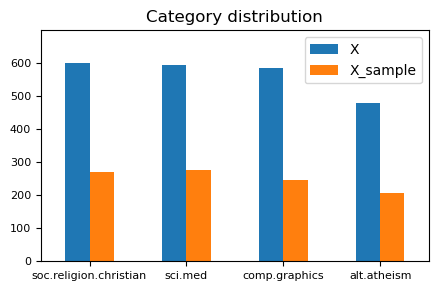

In [4]:
### >>> Exercise 8 (take home):
### -----------------------------------------------------
print("\033[1;34;43m Part 1. Exercise 8 \033[0m")

import matplotlib.pyplot as plt
%matplotlib inline

# combine two compared data
distribution = pd.concat([pd.DataFrame(X.category_name.value_counts()), pd.DataFrame(X_sample.category_name.value_counts())], axis=1, ignore_index=False)

# change the same names of the column to the different
distribution.columns = ['X', 'X_sample']
print("\033[1;34m\n* The distribution of two datasets \033[0m")
display(distribution)

# difine the upper_bound (maximum value for ylim) by finding the maximum values of the data
upper_bound = distribution.max().max()+100

# plot the comparison of the distribution between the two datasets
print("\033[1;34m\n* A side-by-side comparison of the distribution \033[0m")
distribution.plot(kind='bar',
                  title='Category distribution',
                  ylim=[0, upper_bound], 
                  rot=0, fontsize=8, figsize=(5,3))

In [5]:
### >>> Exercise 10 (take home):
### -----------------------------------------------------
print("\033[1;34;43m Part 1. Exercise 10 \033[0m")

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) # learn the vocabulary and return document-term matrix
print("\033[1;34m\n* The shape of CountVectorizered X \033[0m")
print(X_counts.shape)
print("\033[1;31m\n>>> There are 35788 terms in each text. \033[0m")

print("\033[1;31m\nFrom the above, we know that the 1 at the beginning of the fifth record means there is one data of the first term in CountVectorizer, 00,  in the fifth text. \033[0m")
print("\033[1;31m\nTherefore, we need to find out the index of another 1 in the fifth record. \033[0m")

# use "np.nonzero" function to find the positions of non-zero values
print("\033[1;34m\n* Using np.nonzero to find the index of 1 \033[0m")
print(np.nonzero(X_counts[0:5, 0:100].toarray()))
print("\033[1;31m\n>>> Then we can find the element of [4, 0] and [4, 37] are 1. \033[0m")

# find the index [0] and [37] of CountVectorizer
print("\033[1;34m\n* CountVectorizer  \033[0m")
print("The first 1,  [0] represents the  ", count_vect.get_feature_names_out()[0:1])
print("The second 1, [37] represents the ", count_vect.get_feature_names_out()[37:38])
print("\033[1;31m\n>>> We know the second 1 represents [01] by the element of [37] in CountVectorizer. \033[0m")

 Part 1. Exercise 10 

* The shape of CountVectorizered X 
(2257, 35788)

>>> There are 35788 terms in each text. 

From the above, we know that the 1 at the beginning of the fifth record means there is one data of the first term in CountVectorizer, 00,  in the fifth text. 

Therefore, we need to find out the index of another 1 in the fifth record. 

* Using np.nonzero to find the index of 1 
(array([4, 4]), array([ 0, 37]))

>>> Then we can find the element of [4, 0] and [4, 37] are 1. 

* CountVectorizer  
The first 1,  [0] represents the   ['00']
The second 1, [37] represents the  ['01']

>>> We know the second 1 represents [01] by the element of [37] in CountVectorizer. 


 Part 1. Exercise 11 

* The limitation NUM =  100

>>> We filtered the elements that are equal or bigger than NUM 

* The length of plot_x (filtered col)  16

* The length of plot_y (filtered row)  31

* The shape of plot_z (filtered elements)  (31, 16)

* Filtered CountVectorizered X  


['of']  ['the']  ['and']  ['for']  ['in']  ['is']  ['to']  \
doc_[123]      154      250       97       45      99      42      85   
doc_[159]       68      161       22        8      41      44      74   
doc_[178]       35      112       28       14      16      35      56   
doc_[209]       92      153       30       18      37      29      46   
doc_[358]       29      104       18       12      25      26      20   
doc_[400]      165      249      207      157     109     114     135   
doc_[424]      112      128       73       29      45      17      56   
doc_[432]       49      105       52       21      43      43      35   
doc_[433]      190      362      150      117     108     200     227   
doc_[540]       92      200       55       11      31      45      27   
doc_[580]       67      134       50        4      23      11      57   
doc_[614]       39      105       26        8      27      30      33   
doc_[716]       42      140       71       27      38      33      73   
doc_[753]      107      144       58        7      52      47      34   
doc_[758]        2        7        0        1       1       2       1   
doc_[768]      164      200      254      105      69      90     103   
doc_[789]       82      173       81       36      44      49      86   
doc_[951]       42      102       30       10      33      25      36   
doc_[965]       70      146       44       15      49      27      66   
doc_[971]      155      175       73       48      82     126     179   
doc_[1103]     122      200      112       36      76      55     126   
doc_[1251]      91      171       70       22      43      33      61   
doc_[1363]      77      121       32        3      20      15      23   
doc_[1401]     204      217      151       92     146      28      80   
doc_[1403]     326      589      208       60     135     174     281   
doc_[1411]     148      252       43       49      39     189     113   
doc_[1596]     162      265       73       30      98     141     112   
doc_[1666]      63      157       32       19      37      53      77   
doc_[1705]     177      158      118       41      68      21      48   
doc_[1890]      89      242      185      133     100      77     157   
doc_[2255]      68      123       59       32      24      23      64   

            ['image']  ['it']  ['jpeg']  ['you']  ['com']  ['edu']  ['that']  \
doc_[123]           0      13         0        0        3        0        53   
doc_[159]           0      31         0       16        0        0        39   
doc_[178]           0      41         0       49        0        3        69   
doc_[209]           0      20         0        0        0        0        33   
doc_[358]           0      11         0        4        1        1        28   
doc_[400]          44      76         1       52       16       45        39   
doc_[424]           0       4         0        6        3       19        33   
doc_[432]           0      29         0        5        0        2        20   
doc_[433]         103     123       238      190        2       25        85   
doc_[540]           0      22         0        1        0        1        30   
doc_[580]           0      22         0        4        1        2        33   
doc_[614]           0      15         0       30        2        1        47   
doc_[716]           0      31         0       55        7       25         6   
doc_[753]           0       7         0        0        0        1        19   
doc_[758]           0       1         0        1      100      102         0   
doc_[768]         125      87         1       19        1       30        38   
doc_[789]           0      27         0       26        0        0        67   
doc_[951]           0      13         0        5        1        1        42   
doc_[965]           0      40         0       29        2        0        50   
doc_[971]           0      92         0       29        0        0       13


* The figure of filtered CountVectorizered X (more than or equal to 100) 
>>> This figure points out the most of BIG values in X_counts. 


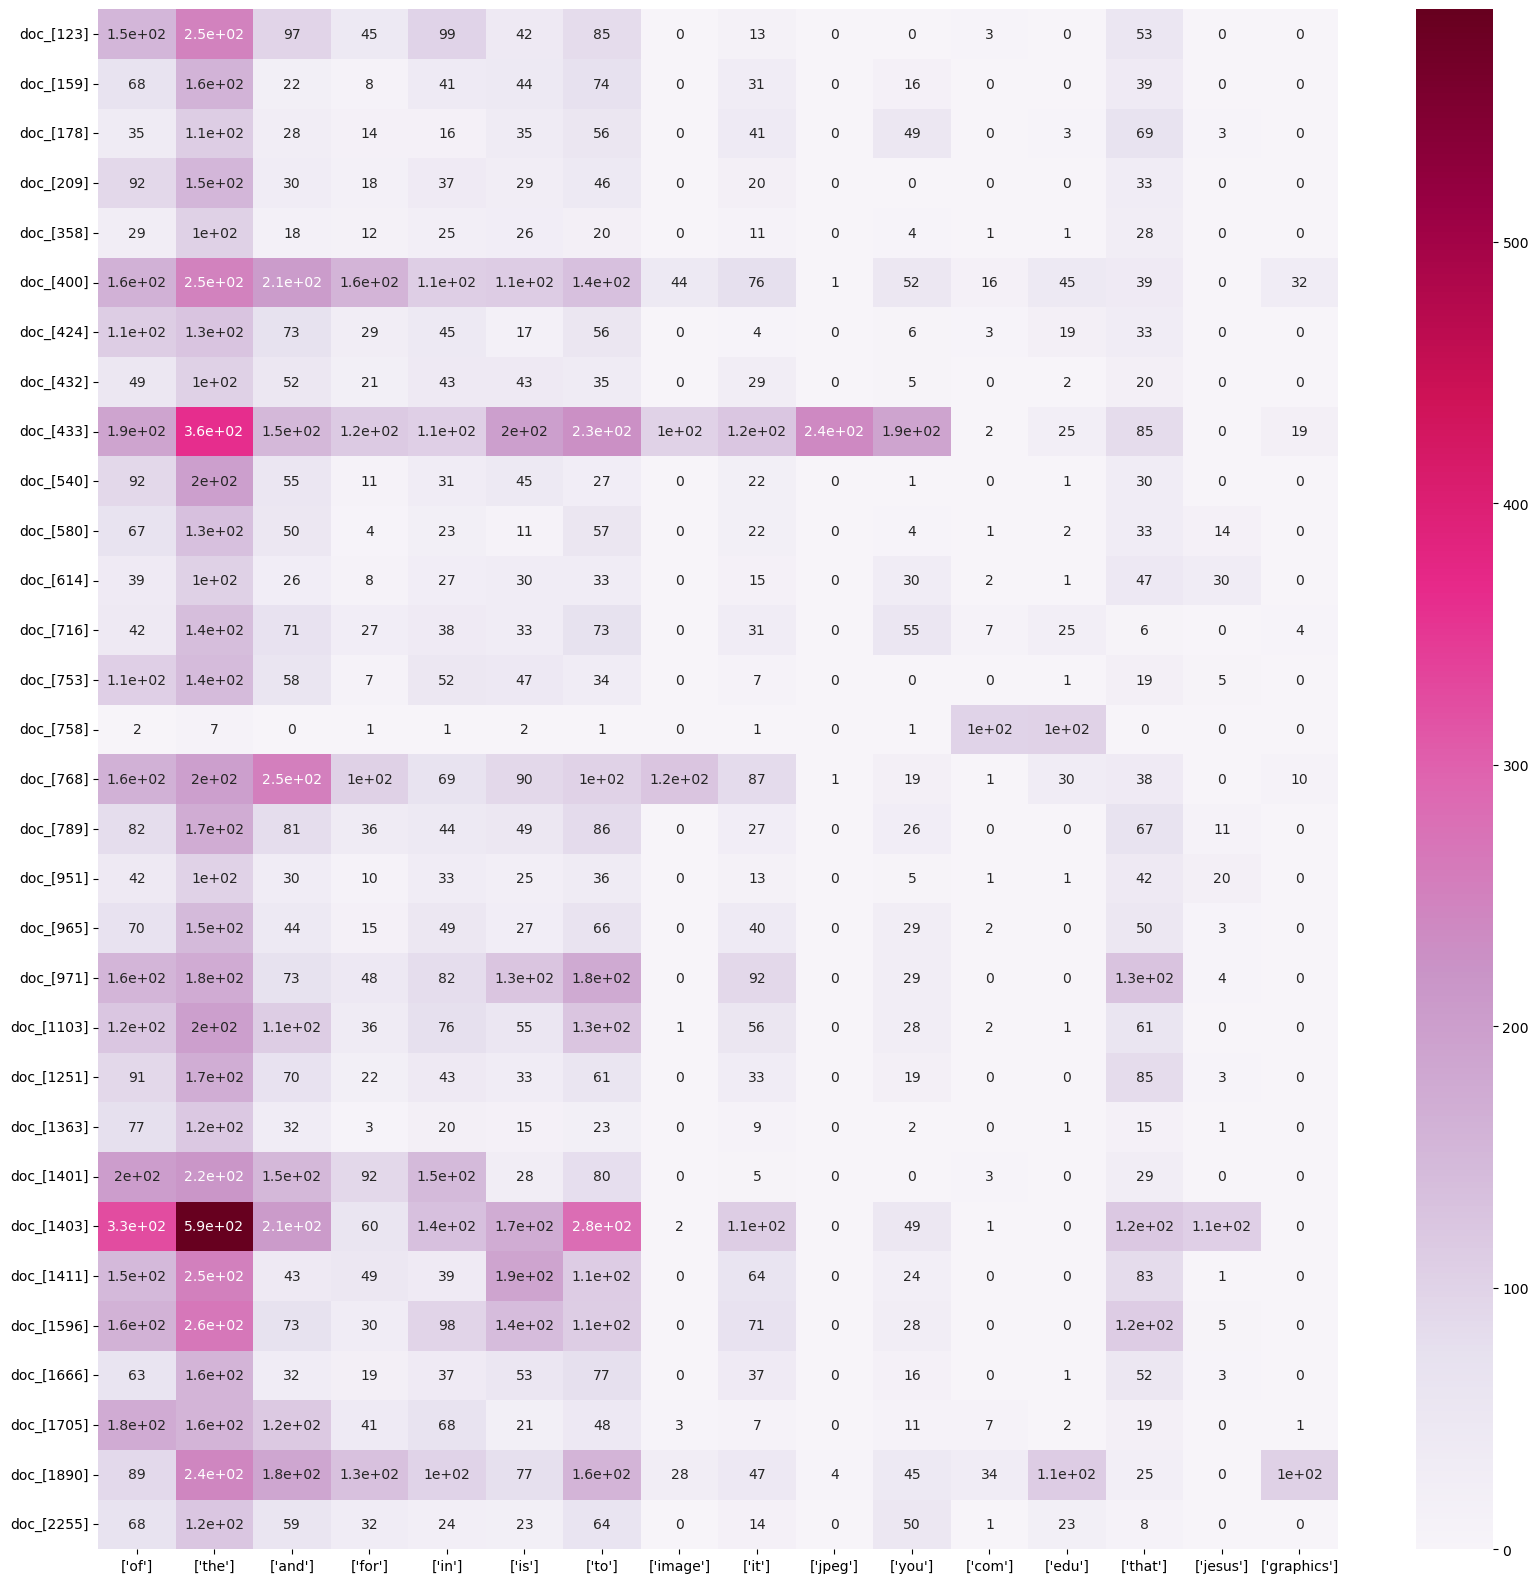

In [6]:
### >>> Exercise 11 (take home):
### -----------------------------------------------------
print("\033[1;34;43m Part 1. Exercise 11 \033[0m")

# !!! note this part takes time to compute!!!

# find the rows and columns that we want (there is element bigger than NUM)
NUM = 100
print("\033[1;34m\n* The limitation NUM = \033[0m", NUM)
print("\033[1;31m\n>>> We filtered the elements that are equal or bigger than NUM \033[0m")

row = [] # initial "row" to place the row index that the related elements are bigger than NUM
col = [] # initial "col" to place the columns that the related elements are bigger than NUM
elm = [] # initial "elm" to place the elements that bigger than NUM

for n in range(X_counts.shape[0]):
    for m in range(X_counts.shape[1]):
        if X_counts[n, m] >= NUM: # determine every element is bigger than NUM or not
            row.append(n) # if the element [n, m] is bigger than NUM, then we place [n] into "row"
            col.append(m) # if the element [n, m] is bigger than NUM, then we place [m] into "col"
            elm.append(X_counts[n, m]) # if the element [n, m] is bigger than NUM, then we place this elements [n, m] into "elm"

row = pd.DataFrame(row) # convert list to dataframe
col = pd.DataFrame(col) # convert list to dataframe

# because there may be more than one elements are bigger than NUM, hence we need to eliminate the duplicates columns and rows
dropDUP_row = row.drop_duplicates(keep='first', inplace=False)
dropDUP_col = col.drop_duplicates(keep='first', inplace=False)

# obtain the term based on the filtered columns
plot_x = []
for i in dropDUP_col.to_numpy():
    term = count_vect.get_feature_names_out()[i]
    plot_x.append(str(term))  
print("\033[1;34m\n* The length of plot_x (filtered col) \033[0m", len(plot_x))

# obtain document index from the conditional rows
plot_y = ["doc_"+str(i) for i in dropDUP_row.to_numpy()[:]]
print("\033[1;34m\n* The length of plot_y (filtered row) \033[0m", len(plot_y))

# obtain partial document-term matrix that is fittable for our "plot_x" and "plot_y"
plot_z = []
for i in dropDUP_row.to_numpy():
    for j in dropDUP_col.to_numpy():
        doc = int(X_counts[i, j])
        plot_z.append(doc)
        
plot_z = np.array(plot_z).reshape(len(dropDUP_row), len(dropDUP_col))
print("\033[1;34m\n* The shape of plot_z (filtered elements) \033[0m", plot_z.shape)

# create figure
print("\033[1;34m\n* Filtered CountVectorizered X  \033[0m")
MYdraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
display(MYdraw)

import seaborn as sns
print("\033[1;34m\n* The figure of filtered CountVectorizered X (more than or equal to {}) \033[0m".format(NUM))
upper_bound = plot_z.max().max()
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(MYdraw,
                 cmap="PuRd",
                 vmin=0, vmax=upper_bound, annot=True)

print("\033[1;31m>>> This figure points out the most of BIG values in X_counts. \033[0m")

 Part 1. Exercise 12 

* The shape of original CountVectorizered X  (2257, 35788)

* The shape of 3D CountVectorizered X  (2257, 3)


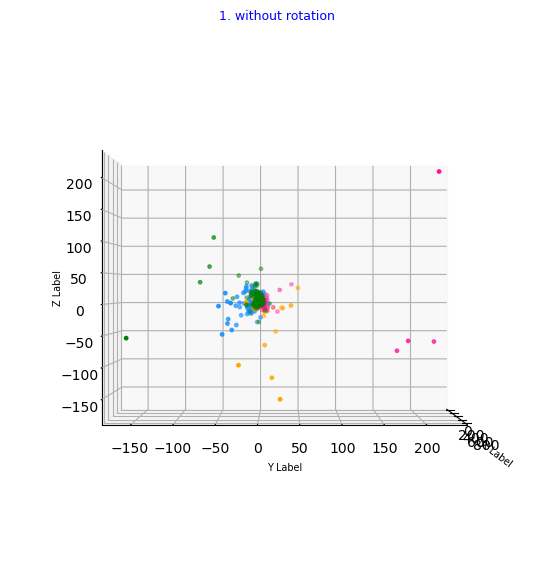

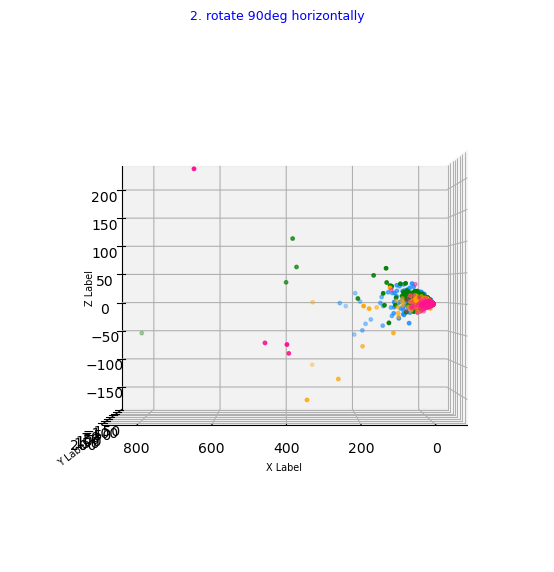

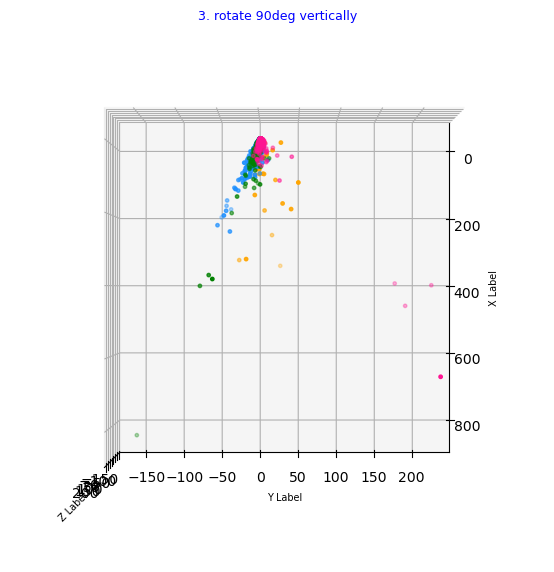

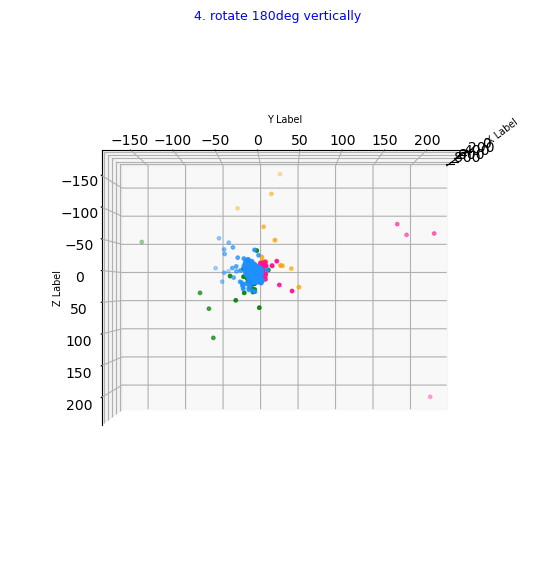

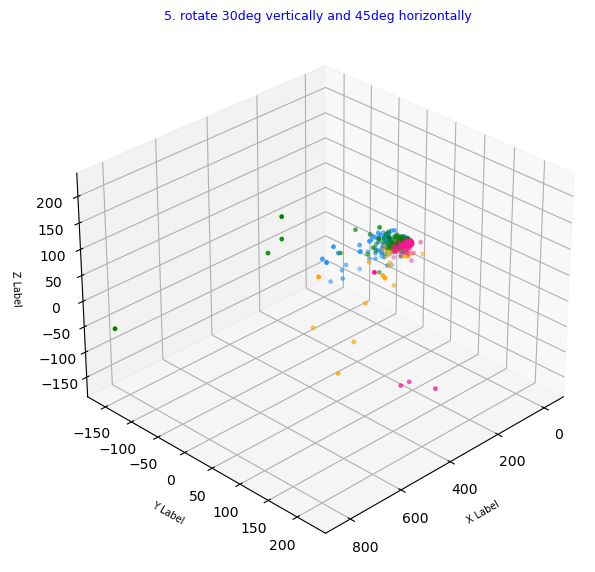

>>> We rotated the 3D plot vertically or horizontally with some degree like above. 

>>> From some 3D visualization above, we can observe there are different distributions of each category from different rotation degree. 

>>> We can see there are a lot of point distributing behind the green markers(alt.atheism) with no rotation from the first plot. 

>>> Based on the degrees that the second and third plots rotate, we can find pink markers(comp.graphics) seem to be in front of the others.

>>> Moreover, we can see blue markers(soc.religion.christian) cover most of the other markers when being upside down according to the forth plot. 


In [7]:
### >>> Exercise 12 (take home):
### -----------------------------------------------------
print("\033[1;34;43m Part 1. Exercise 12 \033[0m")

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d.axes3d import Axes3D

print("\033[1;34m\n* The shape of original CountVectorizered X \033[0m", X_counts.shape)

# process CPA
X_3dim = PCA(n_components=3).fit_transform(X_counts.toarray())
print("\033[1;34m\n* The shape of 3D CountVectorizered X \033[0m", X_3dim.shape)

# difine the color of each category
col = ['green', 'dodgerblue', 'deeppink', 'orange'] # ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# --- create the first subplot
fig = plt.figure(figsize=(40, 20))
ax1 = fig.add_subplot(1, 5, 1, projection='3d')
ax1.view_init(elev=0, azim=0) # "elev" rotate along y_lim, "azim" rotate along z_lim
# ax1 = Axes3D(fig, auto_add_to_figure=False)
# fig.add_axes(ax)

for c, category in zip(col, categories):
    xs = X_3dim[X['category_name'] == category].T[0]
    ys = X_3dim[X['category_name'] == category].T[1]
    zs = X_3dim[X['category_name'] == category].T[2]
   
    ax1.scatter(xs, ys, zs, c=c, marker='o', s=6)

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label', fontsize=7)
ax1.set_ylabel('\nY Label', fontsize=7)
ax1.set_zlabel('\nZ Label', fontsize=7)
ax1.set_title('1. without rotation', fontsize=9, color='blue')

# --- create the second subplot
fig = plt.figure(figsize=(40, 20))
ax2 = fig.add_subplot(1, 5, 2, projection='3d')
ax2.view_init(elev=0, azim=90) # "elev" rotate along y_lim, "azim" rotate along z_lim

for c, category in zip(col, categories):
    xs = X_3dim[X['category_name'] == category].T[0]
    ys = X_3dim[X['category_name'] == category].T[1]
    zs = X_3dim[X['category_name'] == category].T[2]
   
    ax2.scatter(xs, ys, zs, c=c, marker='o', s=6)

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label', fontsize=7)
ax2.set_ylabel('\nY Label', fontsize=7)
ax2.set_zlabel('\nZ Label', fontsize=7)
ax2.set_title('2. rotate 90deg horizontally', fontsize=9, color='blue')

# --- create the third subplot
fig = plt.figure(figsize=(40, 20))
ax3 = fig.add_subplot(1, 5, 3, projection='3d')
ax3.view_init(elev=90, azim=0) # "elev" rotate along y_lim, "azim" rotate along z_lim

for c, category in zip(col, categories):
    xs = X_3dim[X['category_name'] == category].T[0]
    ys = X_3dim[X['category_name'] == category].T[1]
    zs = X_3dim[X['category_name'] == category].T[2]
   
    ax3.scatter(xs, ys, zs, c=c, marker='o', s=6)

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label', fontsize=7)
ax3.set_ylabel('\nY Label', fontsize=7)
ax3.set_zlabel('\nZ Label', fontsize=7)
ax3.set_title('3. rotate 90deg vertically', fontsize=9, color='blue')

# --- create the forth subplot
fig = plt.figure(figsize=(40, 20))
ax4 = fig.add_subplot(1, 5, 4, projection='3d')
ax4.view_init(elev=180, azim=0) # "elev" rotate along y_lim, "azim" rotate along z_lim

for c, category in zip(col, categories):
    xs = X_3dim[X['category_name'] == category].T[0]
    ys = X_3dim[X['category_name'] == category].T[1]
    zs = X_3dim[X['category_name'] == category].T[2]
   
    ax4.scatter(xs, ys, zs, c=c, marker='o', s=6)

ax4.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax4.set_xlabel('\nX Label', fontsize=7)
ax4.set_ylabel('\nY Label', fontsize=7)
ax4.set_zlabel('\nZ Label', fontsize=7)
ax4.set_title('4. rotate 180deg vertically', fontsize=9, color='blue')

# --- create the fifth subplot
fig = plt.figure(figsize=(40, 20))
ax5 = fig.add_subplot(1, 5, 5, projection='3d')
ax5.view_init(elev=30, azim=45) # "elev" rotate along y_lim, "azim" rotate along z_lim

for c, category in zip(col, categories):
    xs = X_3dim[X['category_name'] == category].T[0]
    ys = X_3dim[X['category_name'] == category].T[1]
    zs = X_3dim[X['category_name'] == category].T[2]
   
    ax5.scatter(xs, ys, zs, c=c, marker='o', s=6)

ax5.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax5.set_xlabel('\nX Label', fontsize=7)
ax5.set_ylabel('\nY Label', fontsize=7)
ax5.set_zlabel('\nZ Label', fontsize=7)
ax5.set_title('5. rotate 30deg vertically and 45deg horizontally', fontsize=9, color='blue')

plt.show()

print("\033[1;31m>>> We rotated the 3D plot vertically or horizontally with some degree like above. \033[0m")
print("\033[1;31m\n>>> From some 3D visualization above, we can observe there are different distributions of each category from different rotation degree. \033[0m")
print("\033[1;31m\n>>> We can see there are a lot of point distributing behind the green markers(alt.atheism) with no rotation from the first plot. \033[0m")
print("\033[1;31m\n>>> Based on the degrees that the second and third plots rotate, we can find pink markers(comp.graphics) seem to be in front of the others.\033[0m")
print("\033[1;31m\n>>> Moreover, we can see blue markers(soc.religion.christian) cover most of the other markers when being upside down according to the forth plot. \033[0m")

In [8]:
### >>> Exercise 13 (take home):
### -----------------------------------------------------
print("\033[1;34;43m Part 1. Exercise 13 \033[0m")

print("\033[1;34m\n* The amount of terms(columns) \033[0m", X_counts.shape[1])

# calculate the sum of each column
term_frequencies = np.asarray(X_counts.sum(axis=0))[0] # [10 20 30]

# term_frequencies = []
# print(X_counts.shape[1])
# for j in range(0, X_counts.shape[1]):
#     term_frequencies.append(sum(X_counts[:, j].toarray())) # [array([10]), array([20]), array([30])]

# add the term names into the columns of frequencies
tf = pd.DataFrame(term_frequencies) # convert array to DataFrame (35788, 1)
cv = pd.DataFrame(count_vect.get_feature_names_out()) # convert array to DataFrame (35788, 1)
df = pd.concat([cv, tf], axis=1)
df.columns = ['term', 'frequency'] # difine the column names
print("\033[1;34m\n* New data \033[0m")
display(df)

# import the library
# pip install plotly
import plotly.express as px
import plotly.graph_objects as go

print("\033[1;34m\n* The frequencies for the first fifty terms \033[0m")
fig = px.bar(df[:50],
            x = 'term',
            y = 'frequency',
            text = 'frequency',
            color = 'frequency')
fig.show()

print("\033[1;34m\n* The frequencies for the last fifty terms \033[0m")
fig = px.bar(df[-50:],
            x = 'term',
            y = 'frequency',
            text = 'frequency',
            color = 'frequency')
fig.show()

print("\033[1;31m>>> We can point each bar for getting more information of term name and the corresponding frequency. Furthermore, we can easily observe the approximately frequency by different color as the color bar on the right. \033[0m")

 Part 1. Exercise 13 

* The amount of terms(columns)  35788

* New data 


term  frequency
0                00        134
1               000         92
2              0000          1
3        0000001200          2
4      000005102000          1
...             ...        ...
35783         zyxel          2
35784            zz          1
35785           zzz          1
35786            ªl          1
35787      íålittin          1

[35788 rows x 2 columns]


* The frequencies for the first fifty terms 



* The frequencies for the last fifty terms 


>>> We can point each bar for getting more information of term name and the corresponding frequency. Furthermore, we can easily observe the approximately frequency by different color as the color bar on the right. 


In [9]:
### >>> Exercise 14 (take home):
### -----------------------------------------------------
print("\033[1;34;43m Part 1. Exercise 14 \033[0m")

# select the frequencies that are bigger
print("\033[1;34m\n* The selected data \033[0m")
LIM = 500
sel_df = df[df['frequency'] >= LIM] #(143), >= 100(814), >= 200(410), >= 300(260) 
display(sel_df)

print("\033[1;34m\n* The frequencies are more than or equal to {} \033[0m".format(LIM))
fig = px.bar(sel_df,
            x = 'term',
            y = 'frequency',
            text = 'frequency',
            color = 'frequency')
fig.show()

print("\033[1;31m>>> We can just modify the limitation(LIM) or use greater-than sign, less-than sign or equal sign to only select the partial data that we want to visualize. \033[0m")

 Part 1. Exercise 14 

* The selected data 


term  frequency
3958    about       2148
4720      all       2093
4808     also       1090
4852       am        852
4938       an       2393
...       ...        ...
35275   world        650
35312   would       2000
35350  writes       1645
35638     you       6157
35648    your       1793

[143 rows x 2 columns]


* The frequencies are more than or equal to 500 


>>> We can just modify the limitation(LIM) or use greater-than sign, less-than sign or equal sign to only select the partial data that we want to visualize. 


In [10]:
### >>> Exercise 15 (take home):
### -----------------------------------------------------
print("\033[1;34;43m Part 1. Exercise 15 \033[0m")

# apply sort_values to make the order of frequency ascending or descending
print("\033[1;34m\n* The data in descending order \033[0m")
descending_df = df.sort_values(by=['frequency'], ascending=False).reset_index(drop=True)
display(descending_df)

# creat bar plot
print("\033[1;34m\n* The BAR plot of first 100 frequencies in descending order \033[0m")
fig = px.bar(descending_df[:100],
            x = 'term',
            y = 'frequency',
            text = 'frequency',
            color = 'frequency')
fig.show()

# creat line plot
print("\033[1;34m\n* The LINE plot of first 100 frequencies in descending order \033[0m")
fig = px.line(descending_df[:100],
              x = 'frequency',
              y = 'term')
fig.show()

print("\033[1;31m>>> If we select all the data to visualize, it is hard to find out the long tail of distributions since the gap between the minimum and the maximum is too large. Thus, we only select the first 100 data in descending order for observing the long tail. \033[0m")

 Part 1. Exercise 15 

* The data in descending order 


term  frequency
0           the      29825
1            of      17660
2            to      17222
3           and      13017
4            is      12343
...         ...        ...
35783       pcb          1
35784   pcboard          1
35785     pccvm          1
35786      pcd7          1
35787  íålittin          1

[35788 rows x 2 columns]


* The BAR plot of first 100 frequencies in descending order 



* The LINE plot of first 100 frequencies in descending order 


>>> If we select all the data to visualize, it is hard to find out the long tail of distributions since the gap between the minimum and the maximum is too large. Thus, we only select the first 100 data in descending order for observing the long tail. 


In [11]:
### >>> Exercise 16 (take home):
### -----------------------------------------------------
print("\033[1;34;43m Part 1. Exercise 16 \033[0m")

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer() # convert the labels into one-hot encoding

print("\033[1;34m\n* Data with LabelBinarizered [category] \033[0m")
mlb.fit(X.category) # fit LabelBinarizer to "category"
X['bin_category'] = mlb.transform(X['category']).tolist() # add the LabelBinarizered "category" into original data
display(X[0:10])

print("\033[1;34m\n* Data with LabelBinarizered [category_name] \033[0m")
mlb.fit(X.category_name) # fit LabelBinarizer to "category_name"
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
display(X[0:10])

print("\033[1;31m>>> We can see that no matter we process LabelBinarizer on [category] or [category_name], we can obtain the same outputs from the both. \033[0m")

 Part 1. Exercise 16 

* Data with LabelBinarizered [category] 


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]  
9                 sci.med  [0, 0, 1, 0]


* Data with LabelBinarizered [category_name] 


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  bin_category bin_category_name  
0           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]  
9                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]

>>> We can see that no matter we process LabelBinarizer on [category] or [category_name], we can obtain the same outputs from the both. 


# Part 2

In [12]:
### >>> Data Preparation
### -----------------------------------------------------
print("\033[1;34;43m Part 2. Data Preparation(2) \033[0m")

# define the path and the files that we need
path = 'sentiment labelled sentences/'
file_name = ['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

# read three datasets and combine them into one data
sentence = [] # initial "sentence" list to place first column
score = [] # initial "score" list to place second column
for f in file_name:
    file = open(path+f+'.txt', 'r')
    
    for line in file.readlines():
        s = line.split('\t') # the data format is "sentence \t score \n," thus we split the columns by \t
        sentence.append(s[0]) # append each splited sentence to the last
        score.append(s[1]) # append each splited score to the last

"""
# read three datasets and combine them into one data
list = [] # initial the list to place the lines
for f in file_name:
    file = open(path+f+'.txt', 'r')
    row = file.readlines() # read each line/row
    
    for f in range(len(row)):
        column = row[f].strip().split('\t') # the data format is "sentence \t score \n," thus we split the columns by \t
        list.append(column) # append each splited row to the last 
        
# transform list to DataFrame 
df = pd.DataFrame(list)
df.columns = ['sentence', 'score'] # modify the column names
print("\033[1;34m \n* The combination of three datasets \033[0m")
display(df) 
"""

# create "attribute," sentence and score to related to the list data 
class attribute():

    # class object attribute    
    def __init__(self, sentence, score):
        self.sentence = sentence
        self.score = score
        
list = attribute(sentence=sentence, score=score)

print("\033[1;34m\n* Sentence \033[0m") 
print("type: {}, \tlength: {}".format(type(list.sentence), len(list.sentence)))

print("\033[1;34m\n* Score \033[0m") 
print("type: {}, \tlength: {}".format(type(list.score), len(list.score)))  

print("\033[1;34m\n* The first 2 sentence\033[0m")        
print(list.sentence[:2])

print("\033[1;34m\n* The first 2 score\033[0m")        
print(list.score[:2])
print("\033[1;31m>>> As we can see contents of the data are not clear. \033[0m")

### >>> Exercise 1
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Exercise 1(2) \033[0m")

print("\033[1;34m\n* The first 3 sentences of amazon_cells_labelled data \033[0m")        
print(list.sentence[0:3])

print("\033[1;34m\n* The first 3 sentences of imdb_labelled data \033[0m")
print(list.sentence[1000:1003])

print("\033[1;34m\n* The first 3 sentences of yelp_labelled data \033[0m")
print(list.sentence[2000:2003])

 Part 2. Data Preparation(2) 

* Sentence 
type: <class 'list'>, 	length: 3000

* Score 
type: <class 'list'>, 	length: 3000

* The first 2 sentence
['So there is no way for me to plug it in here in the US unless I go by a converter.', 'Good case, Excellent value.']

* The first 2 score
['0\n', '1\n']
>>> As we can see contents of the data are not clear. 

 Part 2. Exercise 1(2) 

* The first 3 sentences of amazon_cells_labelled data 
['So there is no way for me to plug it in here in the US unless I go by a converter.', 'Good case, Excellent value.', 'Great for the jawbone.']

* The first 3 sentences of imdb_labelled data 
['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ', 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ', 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost 

In [13]:
### >>> Data Transformation - Converting Dictionary into Pandas Dataframe
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Converting Dictionary into Pandas Dataframe(3.1) \033[0m")

# modify the helpers function
def format_rows(docs):
    D = []
    for d in docs:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

print("\033[1;34m\n* The first 2 score after processing format_rows from helpers \033[0m")        
print(format_rows(list.score)[:2])
print("\033[1;31m>>> As we can see contents of the data are clear now. \033[0m")

# transform list to DataFrame
sentence = pd.DataFrame.from_records(format_rows(list.sentence))
score = pd.DataFrame(format_rows(list.score))

df = pd.concat([sentence, score], axis=1) # merge two columns into one data
df.columns = ['sentence', 'score'] # modify the column names
df = df.astype({'score':'int'}) # transform each string-score to an integer
print("\033[1;34m\n* The combination of three datasets \033[0m", end='')
print("\033[1;34m\n --> we use modified helpers function to remove some characters for converting the data to DataFrame \033[0m")
display(df)

### >>> Adding columns
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Adding columns(3.1) \033[0m")

# modify the helper function for depending the score on new column
def format_labels(docs):
    target = []
    for t in docs:
        if t == 0:
            target.append('negative')
        if t == 1:
            target.append('positive')
    return target

print("\033[1;34m\n* Data with adding column [score 0 = negative] and [score 1 = positive] \033[0m")
df['score_name'] = format_labels(df.score)
display(df)

### >>> Exercise 2
### -----------------------------------------------------
print("\033[1;34;43m Part 2. Exercise 2(3.2) \033[0m")

# find the amount of the data with different category
print("\033[1;34m\n* The amount of the data with different category \033[0m")
scores = ['negative', 'positive']
for t in scores:
    print("{}: #{}".format(t, sum(df.loc[:, 'score_name']==t)))
print("\033[1;31m>>> Then we can observe the data of two categories are balanced. \033[0m")

### >>> Exercise 3
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Exercise 3(3.2) \033[0m")

# Finf the first 5 records of every 10th record that belongs to positive
print("\033[1;34m \n* First 5 records of every 10th record that belongs to positive \033[0m")
df[df['score_name'] == 'positive'].iloc[::10][0:5]


 Part 2. Converting Dictionary into Pandas Dataframe(3.1) 

* The first 2 score after processing format_rows from helpers 
[['0 '], ['1 ']]
>>> As we can see contents of the data are clear now. 

* The combination of three datasets 
 --> we use modified helpers function to remove some characters for converting the data to DataFrame 


sentence  score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2995  I think food should have flavor and texture an...      0
2996                           Appetite instantly gone.      0
2997  Overall I was not impressed and would not go b...      0
2998  The whole experience was underwhelming, and I ...      0
2999  Then, as if I hadn't wasted enough of my life ...      0

[3000 rows x 2 columns]


 Part 2. Adding columns(3.1) 

* Data with adding column [score 0 = negative] and [score 1 = positive] 


sentence  score score_name
0     So there is no way for me to plug it in here i...      0   negative
1                           Good case, Excellent value.      1   positive
2                                Great for the jawbone.      1   positive
3     Tied to charger for conversations lasting more...      0   negative
4                                     The mic is great.      1   positive
...                                                 ...    ...        ...
2995  I think food should have flavor and texture an...      0   negative
2996                           Appetite instantly gone.      0   negative
2997  Overall I was not impressed and would not go b...      0   negative
2998  The whole experience was underwhelming, and I ...      0   negative
2999  Then, as if I hadn't wasted enough of my life ...      0   negative

[3000 rows x 3 columns]

 Part 2. Exercise 2(3.2) 

* The amount of the data with different category 
negative: #1500
positive: #1500
>>> Then we can observe the data of two categories are balanced. 

 Part 2. Exercise 3(3.2) 
 
* First 5 records of every 10th record that belongs to positive 


sentence  score score_name
1                         Good case, Excellent value.      1   positive
21  I bought this to use with my Kindle Fire and a...      1   positive
44                       Excellent bluetooth headset.      1   positive
61  I really recommend this faceplates since it lo...      1   positive
78  I love this phone , It is very handy and has a...      1   positive

In [14]:
### >>> Data Mining - Missing values
### -----------------------------------------------------
print("\033[1;34;43m Part 2. Missing values(4.1) \033[0m")

# check quickly whether there are missing values
print("\033[1;34m\n* Checking missing values \033[0m")
display(df.isnull())

print("\033[1;34m\n* Checking missing values in every COLUMN \033[0m")
display(df.isnull().any())

# check the number of missing values of each COLUMN (as "check_missing_values" function)
print("\033[1;34m\n* The amount of missing values \033[0m")

# use the helpers function to count the amount of missing values
display(df.isnull().apply(lambda x: dmh.check_missing_values(x)))
# the other approach: display(df.isnull().sum())

### >>> Exercise 4
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Exercise 4(4.1) \033[0m")

# check the number of missing values of each ROW
print("\033[1;34m\n* Checking missing values in every ROW \033[0m")
display(df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1))

 Part 2. Missing values(4.1) 

* Checking missing values 


sentence  score  score_name
0        False  False       False
1        False  False       False
2        False  False       False
3        False  False       False
4        False  False       False
...        ...    ...         ...
2995     False  False       False
2996     False  False       False
2997     False  False       False
2998     False  False       False
2999     False  False       False

[3000 rows x 3 columns]


* Checking missing values in every COLUMN 


sentence      False
score         False
score_name    False
dtype: bool


* The amount of missing values 


sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           score_name  
0  The amoung of missing records is:   
1                                   0


 Part 2. Exercise 4(4.1) 

* Checking missing values in every ROW 


0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [15]:
### >>> Data Mining - Duplicate Data
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Duplicate Data(4.2) \033[0m")

# check duplicated data
print("\033[1;34m\n* Checking duplicate Data \033[0m")
display(df.duplicated())

print("\033[1;34m\n* The sum of duplicate records \033[0m", sum(df.duplicated()))
print("\033[1;34m* The sum of duplicate sentence records \033[0m", sum(df.duplicated('sentence')))
print("\033[1;31m>>> Here are total 17 duplicated records which do not contain the first and original one. \033[0m")

# show all duplicate data
print("\033[1;34m\n* All duplicated data by sentence \033[0m")
duplicated_df = df[df.duplicated('sentence', keep=False)]
display(duplicated_df)
print(duplicated_df.shape)
print("\033[1;31m>>> Then we can find there are total 34 duplicated records including the first one. \033[0m")

#  get rid of the duplicate data
print("\033[1;34m\n* Removing duplicated records and only keep the first one in the data \033[0m")
dropDUP_df = df.drop_duplicates(keep='first', inplace=False)
dropDUP_df = dropDUP_df.reset_index(drop=True) # reset the index of the DataFrame after dropping duplicate data
display(dropDUP_df)
# ..."keep=False" removes all duplicated data, or "keep='first'" will keep one of duplicated data
# ..."inplace=False" do not apply changes directly on our dataframe
print("\033[1;31m>>> We can observe the data will be 3000-17=2983 records after removing the redundant and dulpicated records, which we want to keep only the first duplicated record, instead of 3000-34=2966, which deleting all the duplicate data. \033[0m")

#  check again duplicated data after removing duplicate data
print("\033[1;34m\n* The amount of duplicate records \033[0m", sum(dropDUP_df.duplicated('sentence')))
print("\033[1;31m>>> Then we can see there is no duplicate data.\033[0m")


 Part 2. Duplicate Data(4.2) 

* Checking duplicate Data 


0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool


* The sum of duplicate records  17
* The sum of duplicate sentence records  17
>>> Here are total 17 duplicated records which do not contain the first and original one. 

* All duplicated data by sentence 


sentence  score score_name
18                                        Works great!.      1   positive
179   If you like a loud buzzing to override all you...      0   negative
180                             Don't buy this product.      0   negative
187                                       Great phone!.      1   positive
262                                        Works great.      1   positive
285                                       Great phone!.      1   positive
290                                        Great Phone.      1   positive
392                               This is a great deal.      1   positive
402                    Excellent product for the price.      1   positive
407                                        Works great.      1   positive
446                                       Does not fit.      0   negative
524                                       Works great!.      1   positive
543                             Don't buy this product.      0   negative
647                                        Great phone.      1   positive
744   If you like a loud buzzing to override all you...      0   negative
748                                       Does not fit.      0   negative
778                               This is a great deal.      1   positive
792                                        Great Phone.      1   positive
892                    Excellent product for the price.      1   positive
896                                        Great phone.      1   positive
1090                   Definitely worth checking out.        1   positive
1125                                            10/10        1   positive
1363                   Definitely worth checking out.        1   positive
1572                                 Not recommended.        0   negative
1585                                 Not recommended.        0   negative
1788                                            10/10        1   positive
2334                                 I love this place.      1   positive
2380                                   I won't be back.      0   negative
2383                             The food was terrible.      0   negative
2505                  I would not recommend this place.      0   negative
2814                                 I love this place.      1   positive
2816                             The food was terrible.      0   negative
2843                                   I won't be back.      0   negative
2846                  I would not recommend this place.      0   negative

(34, 3)
>>> Then we can find there are total 34 duplicated records including the first one. 

* Removing duplicated records and only keep the first one in the data 


sentence  score score_name
0     So there is no way for me to plug it in here i...      0   negative
1                           Good case, Excellent value.      1   positive
2                                Great for the jawbone.      1   positive
3     Tied to charger for conversations lasting more...      0   negative
4                                     The mic is great.      1   positive
...                                                 ...    ...        ...
2978  I think food should have flavor and texture an...      0   negative
2979                           Appetite instantly gone.      0   negative
2980  Overall I was not impressed and would not go b...      0   negative
2981  The whole experience was underwhelming, and I ...      0   negative
2982  Then, as if I hadn't wasted enough of my life ...      0   negative

[2983 rows x 3 columns]

>>> We can observe the data will be 3000-17=2983 records after removing the redundant and dulpicated records, which we want to keep only the first duplicated record, instead of 3000-34=2966, which deleting all the duplicate data. 

* The amount of duplicate records  0
>>> Then we can see there is no duplicate data.


In [16]:
### >>> Data Preprocessing - Sampling
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Sampling(5.1) \033[0m")

print("\033[1;34m\n* The instance of sampling 1000 data \033[0m")
sample_df = dropDUP_df.sample(n=1000, random_state=7) #random state
display(sample_df)

print("\033[1;31m>>> From the sampling data above, we can observe the order of the data will be shuffled after sampling. \033[0m")

### >>> Exercise 6
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Exercise 6(5.1) \033[0m")

print("\033[1;34m\n* Scores \033[0m")
for t in scores:
    print("{}- {}".format(scores.index(t), t))

print("\033[1;34m\n* The original data with already removing duplicare records\033[0m", dropDUP_df.shape)
for t in scores:
    amount = sum(dropDUP_df.loc[:, 'score_name']==t)
    print("Score {}: #{} ({} %)".format(scores.index(t), amount, round(amount*100/len(dropDUP_df), 2))) # calculate the percentage to the whole data
    
print("\033[1;34m\n* The sampling data \033[0m", sample_df.shape)
for t in scores:
    amount = sum(sample_df.loc[:, 'score_name']==t)
    print("Score {}: #{} ({} %)".format(scores.index(t), amount, round(amount*100/len(sample_df), 2))) # calculate the percentage to the whole data

print("\033[1;31m\n>>> Furthermore, we can find the percentages of each category to the whole data changed slightly after doing the sampling, which means the distribution of the categories remain relatively the same. \033[0m")


 Part 2. Sampling(5.1) 

* The instance of sampling 1000 data 


sentence  score score_name
2270  This place is not quality sushi, it is not a q...      0   negative
1684  Well... Just if you keep thinking how bad it i...      0   negative
1085  MANNA FROM HEAVEN is a terrific film that is b...      1   positive
977                             Phone falls out easily.      0   negative
2444                   Nargile - I think you are great.      1   positive
...                                                 ...    ...        ...
2158  This really is how Vegas fine dining used to b...      1   positive
2661                          Awesome service and food.      1   positive
820                                       Doesn't Work.      0   negative
2503                       it was a drive to get there.      0   negative
1808                         Conclusion - I loved it.        1   positive

[1000 rows x 3 columns]

>>> From the sampling data above, we can observe the order of the data will be shuffled after sampling. 

 Part 2. Exercise 6(5.1) 

* Scores 
0- negative
1- positive

* The original data with already removing duplicare records (2983, 3)
Score 0: #1493 (50.05 %)
Score 1: #1490 (49.95 %)

* The sampling data  (1000, 3)
Score 0: #503 (50.3 %)
Score 1: #497 (49.7 %)

>>> Furthermore, we can find the percentages of each category to the whole data changed slightly after doing the sampling, which means the distribution of the categories remain relatively the same. 


 Part 2. Exercise 7(5.1) 

* The amount of data of each score 
negative    503
positive    497
Name: score_name, dtype: int64

* The maximum amount  503

* The barchart of sampling data 


<AxesSubplot:title={'center':'Score distribution'}>

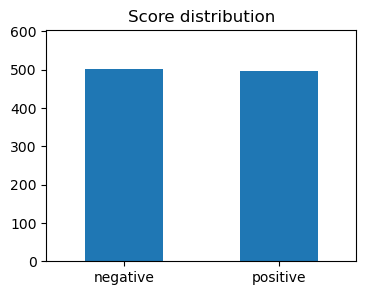

In [17]:
### >>> Exercise 7
### -----------------------------------------------------
print("\033[1;34;43m Part 2. Exercise 7(5.1) \033[0m")

# find the amount of data of each score
print("\033[1;34m\n* The amount of data of each score \033[0m")
print(sample_df.score_name.value_counts())

# find the maximum amount
print("\033[1;34m\n* The maximum amount \033[0m", max(sample_df.score_name.value_counts()))

# automate ylim parameters
upper_bound = max(sample_df.score_name.value_counts()+100)

# plot barchart
print("\033[1;34m\n* The barchart of sampling data \033[0m")
sample_df.score_name.value_counts().plot(kind='bar',
                                         title='Score distribution',
                                         ylim=[0, upper_bound], 
                                         rot=0, fontsize=10, figsize=(4,3))


 Part 2. Exercise 8(5.1) 

* The distribution of original data and sampling data 


original  sampling
negative      1493       503
positive      1490       497


* The maximum amount  1493

* The barchart of the distribution between original data and sampling data 


<AxesSubplot:title={'center':'Score distribution'}>

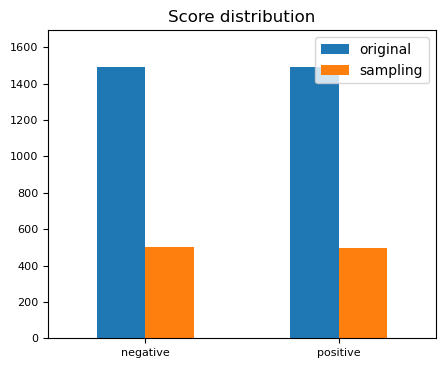

In [18]:
### >>> Exercise 8
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Exercise 8(5.1) \033[0m")

# combine two compared data
distribution = pd.concat([pd.DataFrame(dropDUP_df.score_name.value_counts()), pd.DataFrame(sample_df.score_name.value_counts())], axis=1, ignore_index=False)

# change the same names of the column to the different
distribution.columns = ['original', 'sampling']
print("\033[1;34m\n* The distribution of original data and sampling data \033[0m")
display(distribution)

# difine the upper_bound (maximum value for ylim) by finding the maximum values of the data
print("\033[1;34m\n* The maximum amount \033[0m", distribution.max().max())
upper_bound = distribution.max().max()+200

# plot the comparison of the distribution between the two datasets
print("\033[1;34m\n* The barchart of the distribution between original data and sampling data \033[0m")
distribution.plot(kind='bar',
                  title='Score distribution',
                  ylim=[0, upper_bound], 
                  rot=0, fontsize=8, figsize=(5,4))

In [19]:
### >>> Data Preprocessing - Feature Creation
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Feature Creation(5.2) \033[0m")

# call the nltk library
import nltk
nltk.download('punkt')

# use helpers function to take a like a minute or two to process
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

dropDUP_df['unigrams'] = dropDUP_df['sentence'].apply(lambda x: dmh.tokenize_text(x)) # creating the new column "unigrams" by the tokenizer

print("\033[1;34m\n* The column of [sentence] and [unigrams(by the tokenizer)] \033[0m")
for i in range(4):
    print("\n\033[1;34m[sentence] \033[0m", dropDUP_df.loc[i, 'sentence'])
    print("\033[1;34m[unigrams] \033[0m", dropDUP_df.loc[i, 'unigrams'])
print("\033[1;31m>>> We can see that every sentence splits into words or punctuation marks. \033[0m")

print("\033[1;34m\n* The data with adding column [unigrams(by the tokenizer)] \033[0m")
display(dropDUP_df[0:4])


 Part 2. Feature Creation(5.2) 


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kristenshen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



* The column of [sentence] and [unigrams(by the tokenizer)] 

[sentence]  So there is no way for me to plug it in here in the US unless I go by a converter.
[unigrams]  ['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'US', 'unless', 'I', 'go', 'by', 'a', 'converter', '.']

[sentence]  Good case, Excellent value.
[unigrams]  ['Good', 'case', ',', 'Excellent', 'value', '.']

[sentence]  Great for the jawbone.
[unigrams]  ['Great', 'for', 'the', 'jawbone', '.']

[sentence]  Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
[unigrams]  ['Tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', '45', 'minutes.MAJOR', 'PROBLEMS', '!', '!']
>>> We can see that every sentence splits into words or punctuation marks. 

* The data with adding column [unigrams(by the tokenizer)] 


sentence  score score_name  \
0  So there is no way for me to plug it in here i...      0   negative   
1                        Good case, Excellent value.      1   positive   
2                             Great for the jawbone.      1   positive   
3  Tied to charger for conversations lasting more...      0   negative   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [20]:
### >>> Data Preprocessing - Feature subset selection
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Feature subset selection(5.3) \033[0m")

# use scikit learn built in functionalities to generate this document
from sklearn.feature_extraction.text import CountVectorizer

# transform by count_vect vectorizerlearns the vocabulary dictionary
count_vect = CountVectorizer()
print("\033[1;34m\n* The sentence of the data \033[0m")
print(dropDUP_df.sentence)

# learn the vocabulary dictionary and generate a document-term matrix from the original dataset
dropDUP_df_counts = count_vect.fit_transform(dropDUP_df.sentence) # learn the vocabulary and return document-term matrix
print("\033[1;34m\n* The shape of a document-term matrix \033[0m")
print(dropDUP_df_counts.shape)
print("\033[1;31m>>> There are 5155 terms in each text. \033[0m")

print("\033[1;34m\n* The document term of the first sentence \033[0m")
print(dropDUP_df_counts[0])

# take out the feature names based on the 
print(dropDUP_df_counts[0])
print("\033[1;34m\n  [term 4161] \033[0m", count_vect.get_feature_names_out()[4161])
print("\033[1;34m  [term 4545] \033[0m", count_vect.get_feature_names_out()[4545])
print("\033[1;34m  [term 2427] \033[0m", count_vect.get_feature_names_out()[2427])
print("\033[1;34m  [term 3043] \033[0m", count_vect.get_feature_names_out()[3043])
print("\033[1;34m  [term 4987] \033[0m", count_vect.get_feature_names_out()[4987])

### >>> Exercise 9
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Exercise 9(5.3) \033[0m")

# tokenize each article using a built-in, default tokenizer (often referred to as an analzyer) 
# evate or eliminate the stop words (stop words: are not meaningful for all documents, i.g., I, you, he, she)
analyze = count_vect.build_analyzer()

print("\n\033[1;34m[sentence] \033[0m\n", dropDUP_df.loc[0, 'sentence'])

# analyze the first record of our dataframe with the analyzer
print("\n\033[1;34m[analyzer] \033[0m\n", analyze(dropDUP_df.sentence[0]))
print("\033[1;31m>>> We can observe that the stop word [I] and [a] are eliminated. \033[0m")


 Part 2. Feature subset selection(5.3) 

* The sentence of the data 
0       So there is no way for me to plug it in here i...
1                             Good case, Excellent value.
2                                  Great for the jawbone.
3       Tied to charger for conversations lasting more...
4                                       The mic is great.
                              ...                        
2978    I think food should have flavor and texture an...
2979                             Appetite instantly gone.
2980    Overall I was not impressed and would not go b...
2981    The whole experience was underwhelming, and I ...
2982    Then, as if I hadn't wasted enough of my life ...
Name: sentence, Length: 2983, dtype: object

* The shape of a document-term matrix 
(2983, 5155)
>>> There are 5155 terms in each text. 

* The document term of the first sentence 
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1

In [21]:
### >>> Exercise 10
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Exercise 10(5.3) \033[0m")

# extract the first five articles and transform them into document-term matrix
print("\033[1;34m\n* The first five articles in a 2-dimensional array \033[0m")
print(dropDUP_df_counts[0:5, 0:100].toarray()) # convert from sparse array to normal array

# use "np.nonzero" function to find the positions of non-zero values
print("\033[1;34m\n* The position of 1 (nonzero value) \033[0m")
print(np.nonzero(dropDUP_df_counts[0:5, 0:100].toarray()))
print("\033[1;31m>>> We can find the element of [3, 45] is 1 in the first five articles, which means there is one data of the forty-fifth term in CountVectorizer. \033[0m")

# find the index [45] of CountVectorizer
print("\033[1;34m\n* CountVectorizer we are finding \033[0m")
print("The element [45] represents the ", count_vect.get_feature_names_out()[45:46])
print("\033[1;31m>>> We know the 1 represents [45] by the element of [45] in CountVectorizer. \033[0m")

# find the other indexes of CountVectorizer
print("\033[1;34m\n* Other instances of CountVectorizer \033[0m")
print("The element [10] represents the ", count_vect.get_feature_names_out()[10:11])
print("The element [20] represents the ", count_vect.get_feature_names_out()[20:21])
print("The element [100] represents the ", count_vect.get_feature_names_out()[100:101])
print("The element [1000] represents the ", count_vect.get_feature_names_out()[1000:1001])


 Part 2. Exercise 10(5.3) 

* The first five articles in a 2-dimensional array 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0


 Part 2. Feature subset selection(5.3) 

* Plot_x 
 ['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']

* Plot_y 
 ['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']

* Plot_z 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 

term_00  term_10  term_100  term_11  term_12  term_13  term_15  \
doc_0         0        0         0        0        0        0        0   
doc_1         0        0         0        0        0        0        0   
doc_2         0        0         0        0        0        0        0   
doc_3         0        0         0        0        0        0        0   
doc_4         0        0         0        0        0        0        0   
doc_5         0        0         0        0        0        0        0   
doc_6         0        0         0        0        0        0        0   
doc_7         0        0         0        0        0        0        0   
doc_8         0        0         0        0        0        0        0   
doc_9         0        0         0        0        0        0        0   
doc_10        0        0         0        0        0        0        0   
doc_11        0        0         0        0        0        0        0   
doc_12        0        0         0        0        0        0        0   
doc_13        0        0         0        0        0        0        0   
doc_14        0        0         0        0        0        0        0   
doc_15        0        0         0        0        0        0        0   
doc_16        0        0         0        0        0        0        0   
doc_17        0        0         0        0        0        0        0   
doc_18        0        0         0        0        0        0        0   
doc_19        0        0         0        0        0        0        0   

        term_15g  term_15pm  term_17  term_18  term_18th  term_1928  \
doc_0          0          0        0        0          0          0   
doc_1          0          0        0        0          0          0   
doc_2          0          0        0        0          0          0   
doc_3          0          0        0        0          0          0   
doc_4          0          0        0        0          0          0   
doc_5          0          0        0        0          0          0   
doc_6          0          0        0        0          0          0   
doc_7          0          0        0        0          0          0   
doc_8          0          0        0        0          0          0   
doc_9          0          0        0        0          0          0   
doc_10         0          0        0        0          0          0   
doc_11         0          0        0        0          0          0   
doc_12         0          0        0        0          0          0   
doc_13         0          0        0        0          0          0   
doc_14         0          0        0        0          0          0   
doc_15         0          0        0        0          0          0   
doc_16         0          0        0        0          0          0   
doc_17         0          0        0        0          0          0   
doc_18         0          0        0        0          0          0   
doc_19         0          0        0        0          0          0   

        term_1947  term_1948  term_1949  term_1971  term_1973  term_1979  \
doc_0           0          0          0          0          0          0   
doc_1           0          0          0          0          0          0   
doc_2           0          0          0          0          0          0   
doc_3           0          0          0          0          0          0   
doc_4           0          0          0          0          0          0   
doc_5           0          0          0          0          0          0   
doc_6           0          0          0          0          0          0   
doc_7           0          0          0          0          0          0   
doc_8           0          0          0          0          0          0   
doc_9           0          0          0          0          0          0   
doc_10          0          0          0          0          0          0   
doc_11          0          0          0          


* The figure of data of first twenty features and index 
>>> We can easily visualize that there is ALL zero in the first twenty columns and the first twenty rows. 


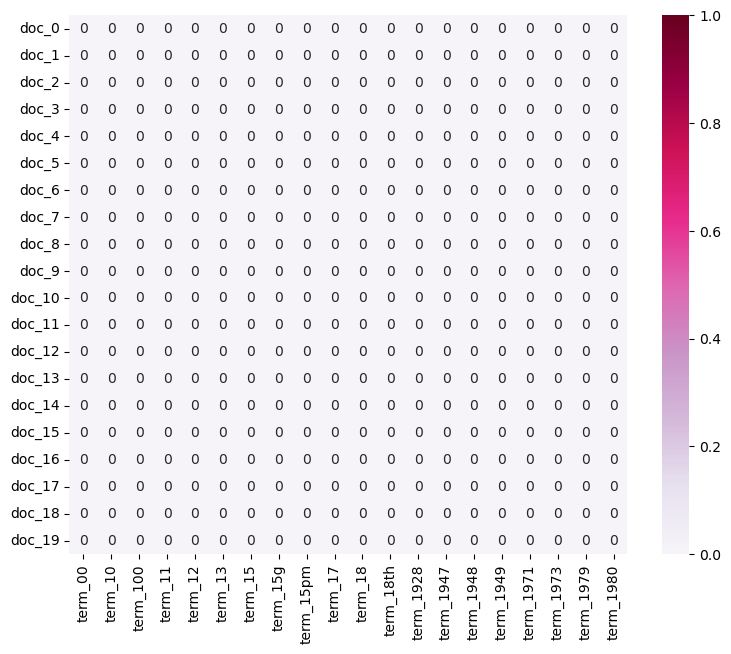

In [22]:
### >>> Data Preprocessing - Feature subset selection
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Feature subset selection(5.3) \033[0m")

# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print("\033[1;34m\n* Plot_x \033[0m\n", plot_x)

# obtain document index
plot_y = ["doc_"+str(i) for i in dropDUP_df.index[0:20]]
print("\033[1;34m\n* Plot_y \033[0m\n", plot_y)

plot_z = dropDUP_df_counts[0:20, 0:20].toarray() # counts[how many documents, how many terms]
print("\033[1;34m\n* Plot_z \033[0m\n", plot_z)

# create figure
import seaborn as sns

draw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
print("\033[1;34m\n* The DataFrame that we want to visualize \033[0m\n")
display(draw)

print("\033[1;34m\n* The figure of data of first twenty features and index \033[0m", )
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(draw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
print("\033[1;31m>>> We can easily visualize that there is ALL zero in the first twenty columns and the first twenty rows. \033[0m")


 Part 2. Exercise 11(5.3) 

* The limitation NUM =  4
>>> We filtered the elements that are equal or bigger than NUM 

* The length of plot_x (filtered col)  10

* The length of plot_y (filtered row)  48

* The shape of plot_z (filtered elements)  (48, 10)

* Filtered CountVectorizered dropDUP_df  


['to']  ['the']  ['my']  ['and']  ['it']  ['of']  ['is']  \
doc_[5]          4        1       0        0       1       0       0   
doc_[65]         0        4       0        1       0       1       1   
doc_[160]        0        4       0        0       2       0       1   
doc_[634]        2        4       0        0       0       1       0   
doc_[653]        1        4       0        1       0       0       0   
doc_[717]        0        1       4        1       0       1       0   
doc_[723]        0        4       0        1       0       0       3   
doc_[827]        0        4       0        2       1       1       0   
doc_[925]        1        1       1        4       0       0       0   
doc_[1027]       0        0       0        0       4       0       0   
doc_[1037]       0        6       0        2       0       3       2   
doc_[1059]       1        4       0        0       0       0       1   
doc_[1066]       0        4       0        0       0       0       0   
doc_[1111]       2        4       0        1       0       2       0   
doc_[1252]       1        4       0        1       0       1       1   
doc_[1265]       1        4       0        2       0       0       3   
doc_[1285]       0        3       0        0       0       4       0   
doc_[1288]       1        8       0        3       2       2       1   
doc_[1379]       0        6       0        1       1       3       1   
doc_[1404]       1        4       1        2       0       0       1   
doc_[1410]       0        4       0        5       0       0       4   
doc_[1411]       0        2       0        1       4       0       0   
doc_[1426]       1        5       0        2       0       1       0   
doc_[1452]       0        4       0        0       0       2       0   
doc_[1548]       0        4       0        0       1       2       1   
doc_[1564]       2        0       0        1       3       0       0   
doc_[1566]       2        4       0        0       0       2       0   
doc_[1576]       0        4       0        1       0       1       2   
doc_[1608]       1        4       0        8       0       4       1   
doc_[1673]       3        4       0        0       0       0       0   
doc_[1701]       0        4       0        0       0       2       0   
doc_[1731]       1        4       0        2       0       0       3   
doc_[1759]       1        5       0        0       0       1       1   
doc_[1761]       0        4       0        1       0       0       1   
doc_[1771]       0        7       0        2       0       1       2   
doc_[1786]       0        4       0        0       1       1       1   
doc_[1790]       1        2       0        4       0       0       1   
doc_[1806]       1        4       0        3       0       1       0   
doc_[1813]       1        4       0        1       1       0       0   
doc_[1869]       0        6       0        0       0       0       0   
doc_[1877]       0        4       0        1       0       1       0   
doc_[1918]       0        4       0        1       0       1       0   
doc_[1944]       0        4       0        2       1       1       0   
doc_[2514]       4        1       0        1       1       0       0   
doc_[2708]       0        4       0        2       0       0       0   
doc_[2782]       4        1       0        1       0       0       0   
doc_[2934]       0        4       0        2       0       1       0   
doc_[2953]       4        3       0        0       0       1       0   

            ['scamp']  ['that']  ['sucks']  
doc_[5]             0         0          0  
doc_[65]            0         2          0  
doc_[160]           0         0          0  
doc_[634]           0         0          0  
doc_[653]           0         0          0  
doc_[717]           0         0          0  
doc_[723]           0         1          0  
doc_[827]           0         0          0  
doc_[925]           0         0          0  
doc_[1027]          0         0  


* The figure of filtered CountVectorizered dropDUP_df  
>>> This figure points out the most of BIG values in X_counts. 


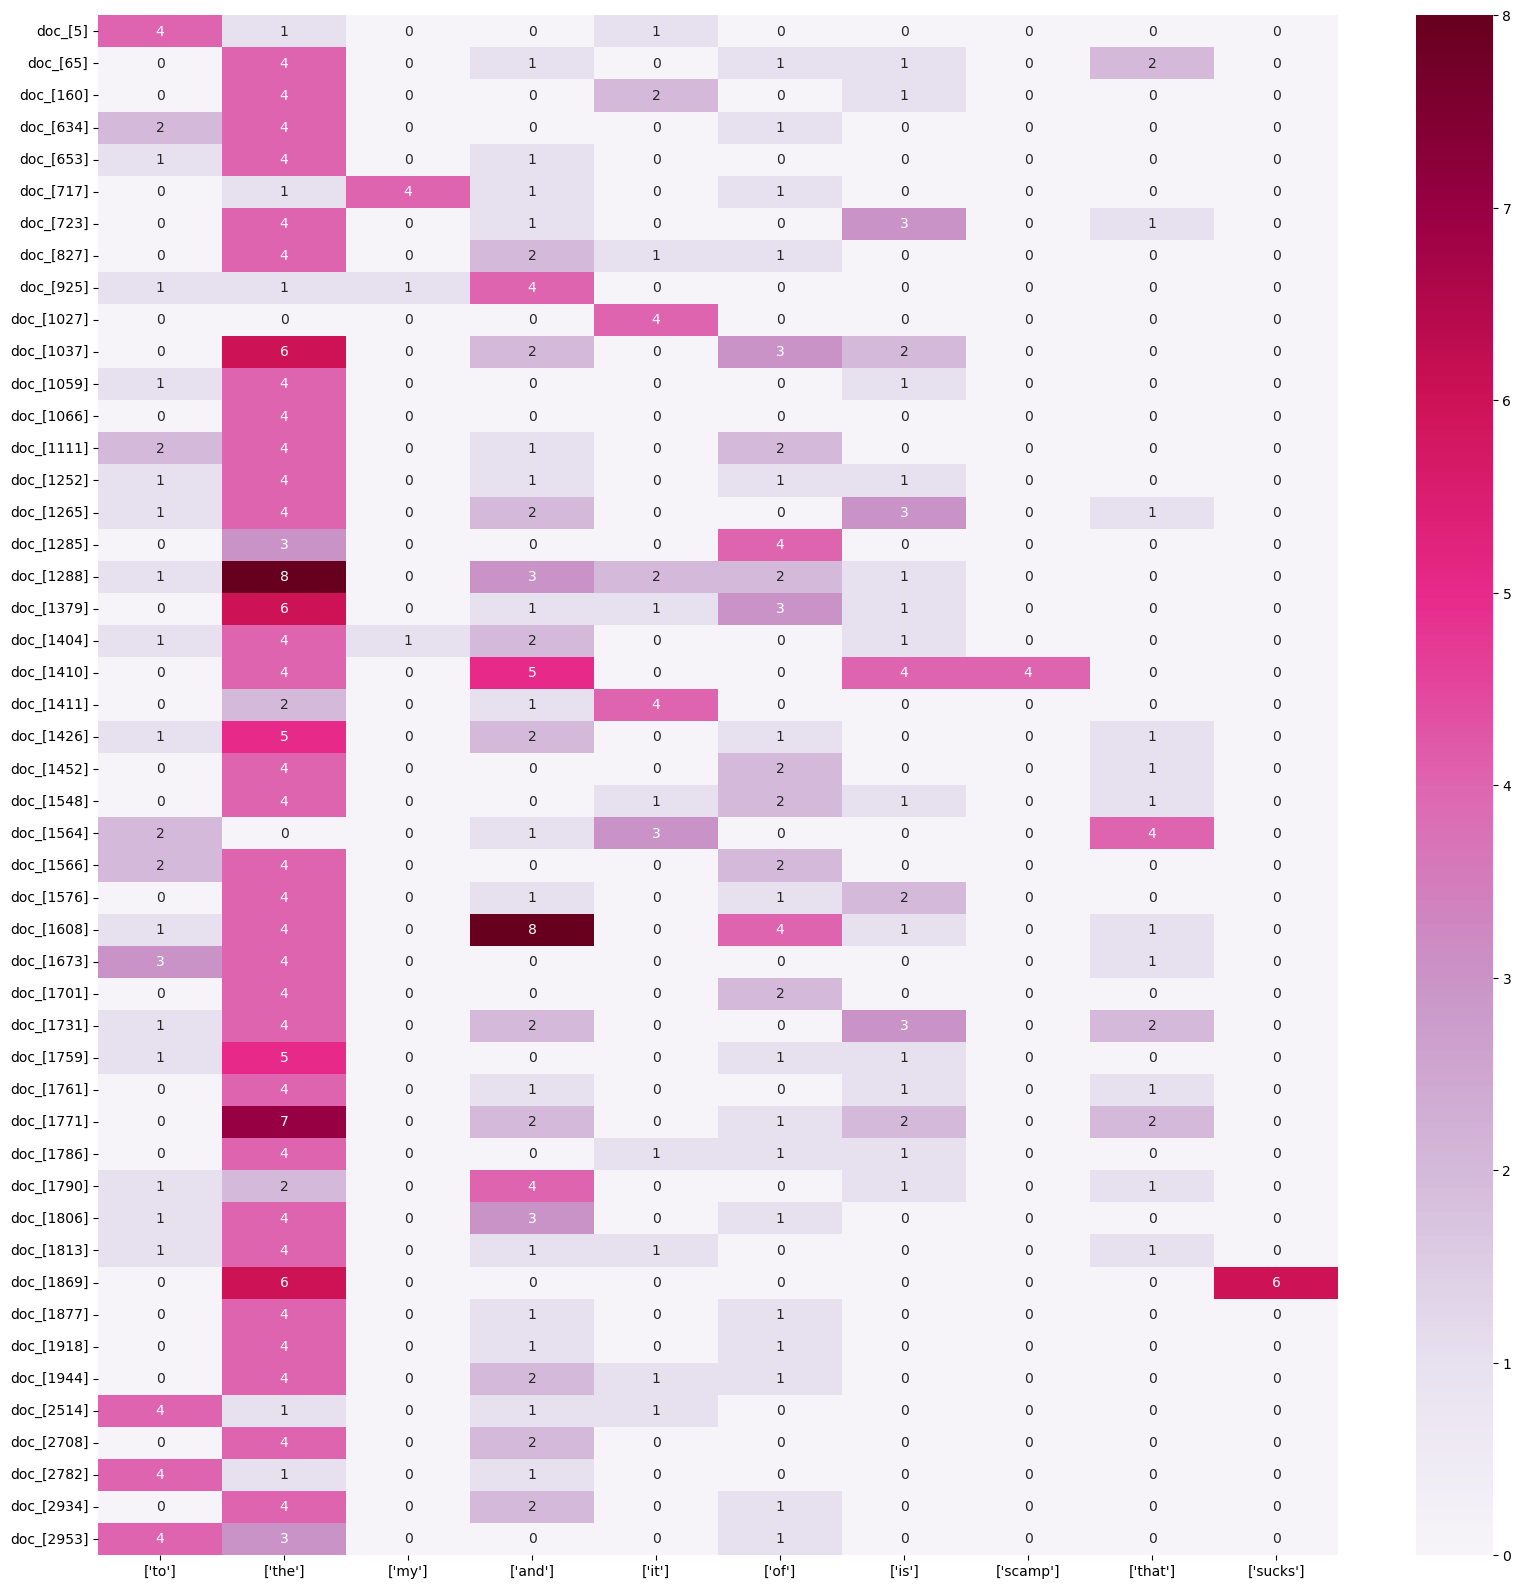

In [23]:
### >>> Exercise 11
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Exercise 11(5.3) \033[0m")

# find the rows and columns that we want (there is element bigger than NUM)
NUM = 4
print("\033[1;34m\n* The limitation NUM = \033[0m", NUM)
print("\033[1;31m>>> We filtered the elements that are equal or bigger than NUM \033[0m")

row = [] # initial "row" to place the row index that the related elements are bigger than NUM
col = [] # initial "col" to place the columns that the related elements are bigger than NUM
elm = [] # initial "elm" to place the elements that bigger than NUM

for n in range(dropDUP_df_counts.shape[0]):
    for m in range(dropDUP_df_counts.shape[1]):
        if dropDUP_df_counts[n, m] >= NUM: # determine every element is bigger than NUM or not
            row.append(n) # if the element [n, m] is bigger than NUM, then we place [n] into "row"
            col.append(m) # if the element [n, m] is bigger than NUM, then we place [m] into "col"
            elm.append(dropDUP_df_counts[n, m]) # if the element [n, m] is bigger than NUM, then we place this elements [n, m] into "elm"

row = pd.DataFrame(row) # convert list to dataframe
col = pd.DataFrame(col) # convert list to dataframe

# because there may be more than one elements are bigger than NUM, hence we need to eliminate the duplicates columns and rows
dropDUP_row = row.drop_duplicates(keep='first', inplace=False)
dropDUP_col = col.drop_duplicates(keep='first', inplace=False)

# obtain the term based on the filtered columns
plot_x = []
for i in dropDUP_col.to_numpy():
    term = count_vect.get_feature_names_out()[i]
    plot_x.append(str(term))  
print("\033[1;34m\n* The length of plot_x (filtered col) \033[0m", len(plot_x))

# obtain document index from the conditional rows
plot_y = ["doc_"+str(i) for i in dropDUP_row.to_numpy()[:]]
print("\033[1;34m\n* The length of plot_y (filtered row) \033[0m", len(plot_y))

# obtain partial document-term matrix that is fittable for our "plot_x" and "plot_y"
plot_z = []
for i in dropDUP_row.to_numpy():
    for j in dropDUP_col.to_numpy():
        doc = int(dropDUP_df_counts[i, j])
        plot_z.append(doc)
        
plot_z = np.array(plot_z).reshape(len(dropDUP_row), len(dropDUP_col))
print("\033[1;34m\n* The shape of plot_z (filtered elements) \033[0m", plot_z.shape)

# create figure
print("\033[1;34m\n* Filtered CountVectorizered dropDUP_df  \033[0m")
MYdraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
display(MYdraw)

import seaborn as sns
print("\033[1;34m\n* The figure of filtered CountVectorizered dropDUP_df  \033[0m")
upper_bound = plot_z.max().max()
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(MYdraw,
                 cmap="PuRd",
                 vmin=0, vmax=upper_bound, annot=True)

print("\033[1;31m>>> This figure points out the most of BIG values in X_counts. \033[0m")


 Part 2. Dimensionality Reduction(5.4) 

* The shape of original CountVectorizered df  (2983, 5155)

* The shape of 2D CountVectorizered df  (2983, 2)

* The 2D plot 


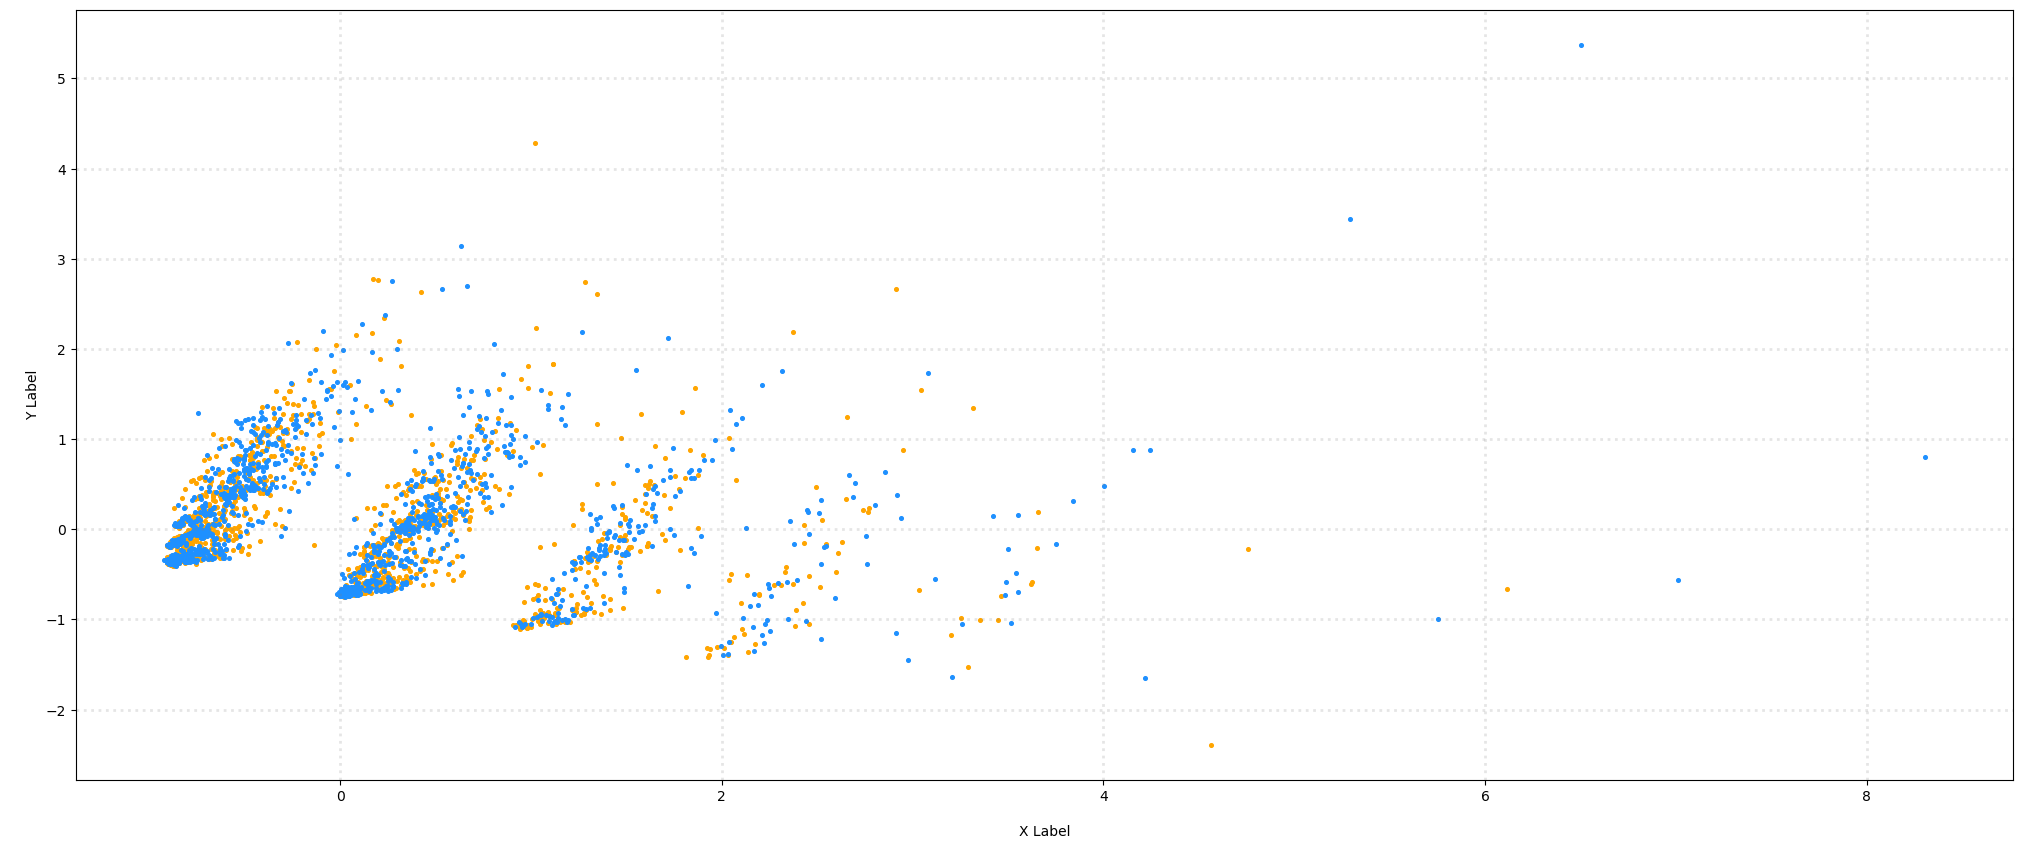

In [24]:
### >>> Data Preprocessing - Dimensionality Reduction
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Dimensionality Reduction(5.4) \033[0m")

print("\033[1;34m\n* The shape of original CountVectorizered df \033[0m", dropDUP_df_counts.shape)

# process CPA
dropDUP_df_2dim = PCA(n_components=2).fit_transform(dropDUP_df_counts.toarray())
print("\033[1;34m\n* The shape of 2D CountVectorizered df \033[0m", dropDUP_df_2dim.shape)

# difine the color of each category
col = ['orange', 'dodgerblue'] # scores = ['negative', 'positive']

# creat figure
print("\033[1;34m\n* The 2D plot \033[0m")
fig = plt.figure(figsize = (25, 10))
ax = fig.subplots()

for c, s in zip(col, scores):
    xs = dropDUP_df_2dim[dropDUP_df['score_name'] == s].T[0]
    ys = dropDUP_df_2dim[dropDUP_df['score_name'] == s].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o', s=7)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()


 Part 2. Exercise 12(5.4) 

* The shape of original CountVectorizered df  (2983, 5155)

* The shape of 3D CountVectorizered df  (2983, 3)


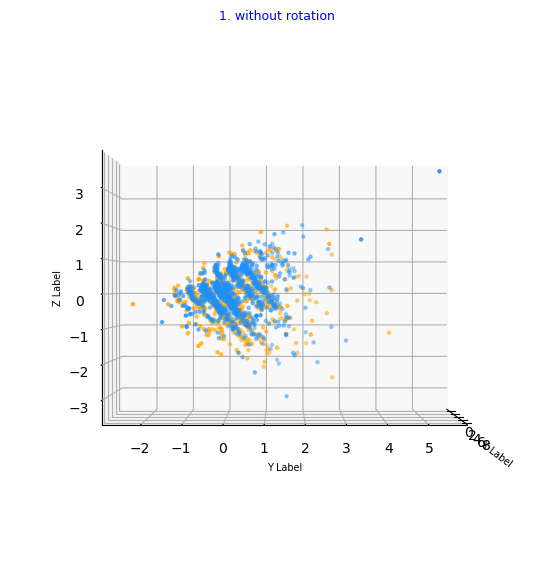

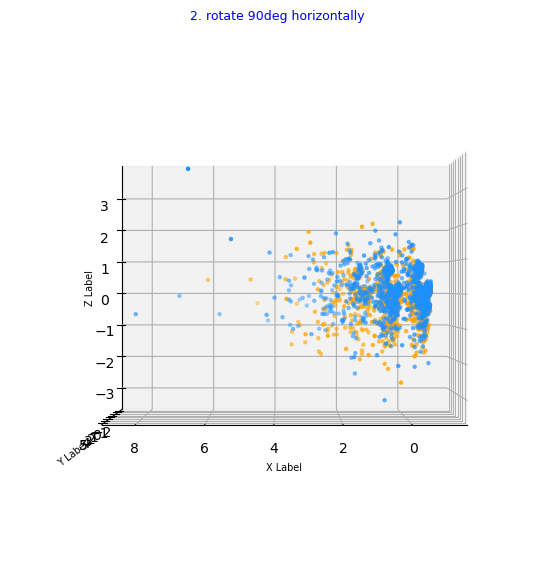

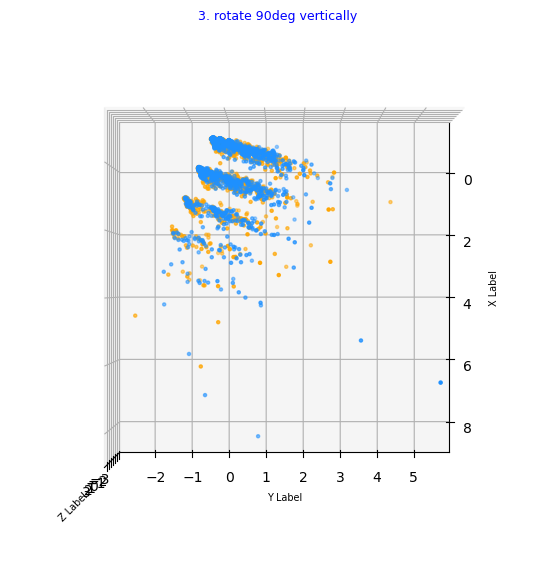

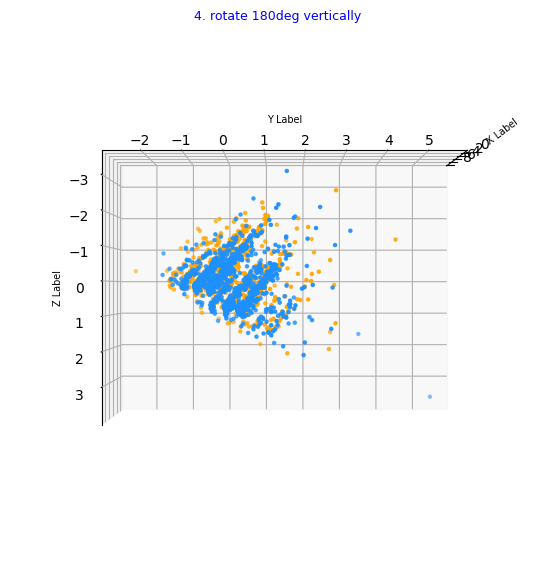

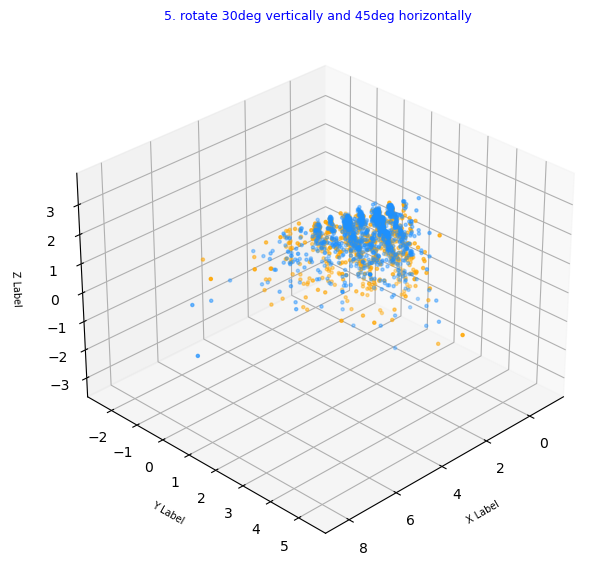

>>> We rotated the 3D plot vertically or horizontally with some degree like above. 

>>> From some 3D visualization above, we can observe there are different distributions of each category from different rotation degree. 

>>> Here, we see most of rotation dergrees contribute that most of blue markers(positive) are in front of orange markers(negative). 


In [25]:
### >>> Exercise 12
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Exercise 12(5.4) \033[0m")

from mpl_toolkits.mplot3d.axes3d import Axes3D

print("\033[1;34m\n* The shape of original CountVectorizered df \033[0m", dropDUP_df_counts.shape)

# process CPA
dropDUP_df_3dim = PCA(n_components=3).fit_transform(dropDUP_df_counts.toarray())
print("\033[1;34m\n* The shape of 3D CountVectorizered df \033[0m", dropDUP_df_3dim.shape)

# difine the color of each category
col = ['orange', 'dodgerblue'] # scores = ['negative', 'positive']

# --- create the first subplot
fig = plt.figure(figsize=(40, 20))
ax1 = fig.add_subplot(1, 5, 1, projection='3d')
ax1.view_init(elev=0, azim=0) # "elev" rotate along y_lim, "azim" rotate along z_lim
# ax1 = Axes3D(fig, auto_add_to_figure=False)
# fig.add_axes(ax)

for c, s in zip(col, scores):
    xs = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[0]
    ys = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[1]
    zs = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[2]
   
    ax1.scatter(xs, ys, zs, c=c, marker='o', s=5)

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label', fontsize=7)
ax1.set_ylabel('\nY Label', fontsize=7)
ax1.set_zlabel('\nZ Label', fontsize=7)
ax1.set_title('1. without rotation', fontsize=9, color='blue')

# --- create the second subplot
fig = plt.figure(figsize=(40, 20))
ax2 = fig.add_subplot(1, 5, 2, projection='3d')
ax2.view_init(elev=0, azim=90) # "elev" rotate along y_lim, "azim" rotate along z_lim

for c, s in zip(col, scores):
    xs = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[0]
    ys = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[1]
    zs = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[2]
   
    ax2.scatter(xs, ys, zs, c=c, marker='o', s=5)

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label', fontsize=7)
ax2.set_ylabel('\nY Label', fontsize=7)
ax2.set_zlabel('\nZ Label', fontsize=7)
ax2.set_title('2. rotate 90deg horizontally', fontsize=9, color='blue')

# --- create the third subplot
fig = plt.figure(figsize=(40, 20))
ax3 = fig.add_subplot(1, 5, 3, projection='3d')
ax3.view_init(elev=90, azim=0) # "elev" rotate along y_lim, "azim" rotate along z_lim

for c, s in zip(col, scores):
    xs = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[0]
    ys = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[1]
    zs = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[2]
   
    ax3.scatter(xs, ys, zs, c=c, marker='o', s=5)

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label', fontsize=7)
ax3.set_ylabel('\nY Label', fontsize=7)
ax3.set_zlabel('\nZ Label', fontsize=7)
ax3.set_title('3. rotate 90deg vertically', fontsize=9, color='blue')

# --- create the forth subplot
fig = plt.figure(figsize=(40, 20))
ax4 = fig.add_subplot(1, 5, 4, projection='3d')
ax4.view_init(elev=180, azim=0) # "elev" rotate along y_lim, "azim" rotate along z_lim

for c, s in zip(col, scores):
    xs = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[0]
    ys = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[1]
    zs = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[2]
   
    ax4.scatter(xs, ys, zs, c=c, marker='o', s=5)

ax4.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax4.set_xlabel('\nX Label', fontsize=7)
ax4.set_ylabel('\nY Label', fontsize=7)
ax4.set_zlabel('\nZ Label', fontsize=7)
ax4.set_title('4. rotate 180deg vertically', fontsize=9, color='blue')

# --- create the fifth subplot
fig = plt.figure(figsize=(40, 20))
ax5 = fig.add_subplot(1, 5, 5, projection='3d')
ax5.view_init(elev=30, azim=45) # "elev" rotate along y_lim, "azim" rotate along z_lim
# ax1 = Axes3D(fig, auto_add_to_figure=False)
# fig.add_axes(ax)

for c, s in zip(col, scores):
    xs = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[0]
    ys = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[1]
    zs = dropDUP_df_3dim[dropDUP_df['score_name'] == s].T[2]
    
    ax5.scatter(xs, ys, zs, c=c, marker='o', s=5)

ax5.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax5.set_xlabel('\nX Label', fontsize=7)
ax5.set_ylabel('\nY Label', fontsize=7)
ax5.set_zlabel('\nZ Label', fontsize=7)
ax5.set_title('5. rotate 30deg vertically and 45deg horizontally', fontsize=9, color='blue')

plt.show()

print("\033[1;31m>>> We rotated the 3D plot vertically or horizontally with some degree like above. \033[0m")
print("\033[1;31m\n>>> From some 3D visualization above, we can observe there are different distributions of each category from different rotation degree. \033[0m")
print("\033[1;31m\n>>> Here, we see most of rotation dergrees contribute that most of blue markers(positive) are in front of orange markers(negative). \033[0m")


 Part 2. Attribute Transformation / Aggregation(5.5) 

* The amount of terms(columns)  5155

* The sums of the first ten columns 
[ 1 36  3  2  4  3  3  1  1  2]

* The frequencies for each term 
>>> Here we can find out that it is hard to read every frequecy from this bar plot, because the gap between the minimum and maximum are too big. 


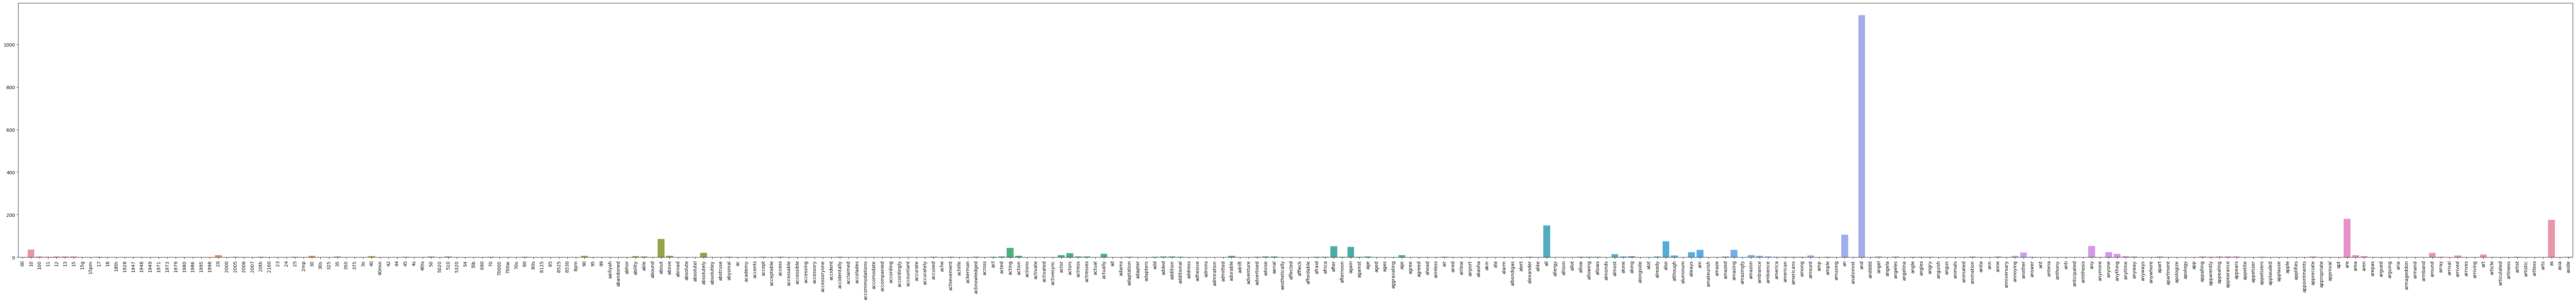

In [26]:
### >>> Data Preprocessing - Attribute Transformation / Aggregation
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Attribute Transformation / Aggregation(5.5) \033[0m")

print("\033[1;34m\n* The amount of terms(columns) \033[0m", dropDUP_df_counts.shape[1])

# calculate the sum of each column
term_freq = np.asarray(dropDUP_df_counts.sum(axis=0))[0] # [10 20 30]

# term_freq = []
# for j in range(0, dropDUP_df_counts.shape[1]):
#     term_freq.append(sum(dropDUP_df_counts[:, j].toarray())) # [array([10]), array([20]), array([30])]

print("\033[1;34m\n* The sums of the first ten columns \033[0m")
print(term_freq[0:10])

# create figure
print("\033[1;34m\n* The frequencies for each term \033[0m")
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
                y=term_freq[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)

print("\033[1;31m>>> Here we can find out that it is hard to read every frequecy from this bar plot, because the gap between the minimum and maximum are too big. \033[0m")

In [27]:
### >>> Exercise 13
### -----------------------------------------------------
print("\033[1;34;43m Part 2. Exercise 13(5.5) \033[0m")

print("\033[1;34m\n* The amount of terms(columns) \033[0m", dropDUP_df_counts.shape[1])

# add the term names into the columns of frequencies
tf = pd.DataFrame(term_freq) # convert array to DataFrame
cv = pd.DataFrame(count_vect.get_feature_names_out()) # convert array to DataFrame
termADDfreq = pd.concat([cv, tf], axis=1)
termADDfreq.columns = ['term', 'frequency'] # difine the column names
print("\033[1;34m\n* Concat each term to corresponding frequency \033[0m")
display(termADDfreq)

# import the library
# pip install plotly
import plotly.express as px
import plotly.graph_objects as go

print("\033[1;34m\n* The frequencies for the first fifty terms \033[0m")
fig = px.bar(termADDfreq[:50],
            x = 'term',
            y = 'frequency',
            text = 'frequency',
            color = 'frequency')
fig.show()

print("\033[1;34m\n* The frequencies for the last fifty terms \033[0m")
fig = px.bar(termADDfreq[-50:],
            x = 'term',
            y = 'frequency',
            text = 'frequency',
            color = 'frequency')
fig.show()

print("\033[1;31m>>> We can point each bar for getting more information of term name and the corresponding frequency. Furthermore, we can easily observe the approximately frequency by different color as the color bar on the right. \033[0m")

 Part 2. Exercise 13(5.5) 

* The amount of terms(columns)  5155

* Concat each term to corresponding frequency 


term  frequency
0          00          1
1          10         36
2         100          3
3          11          2
4          12          4
...       ...        ...
5150    z500a          1
5151     zero          6
5152  zillion          1
5153   zombie          2
5154  zombiez          1

[5155 rows x 2 columns]


* The frequencies for the first fifty terms 



* The frequencies for the last fifty terms 


>>> We can point each bar for getting more information of term name and the corresponding frequency. Furthermore, we can easily observe the approximately frequency by different color as the color bar on the right. 


In [28]:
### >>> Exercise 14
### -----------------------------------------------------
print("\033[1;34;43m Part 2. Exercise 14(5.5) \033[0m")

# select the frequencies that are bigger
print("\033[1;34m\n* The selected data \033[0m")
LIM = 200
sel_termADDfreq = termADDfreq[termADDfreq['frequency'] >= LIM] #(143), >= 100(814), >= 200(410), >= 300(260) 
display(sel_termADDfreq)

print("\033[1;34m\n* The frequencies are more than or equal to {} \033[0m".format(LIM))
fig = px.bar(sel_termADDfreq,
            x = 'term',
            y = 'frequency',
            text = 'frequency',
            color = 'frequency')
fig.show()

print("\033[1;31m>>> We can just modify the limitation(LIM) or use greater-than sign, less-than sign or equal sign to only select the partial data that we want to visualize. \033[0m")
print("\033[1;31m\n>>> And we can find the words which appear more frequently on the data. \033[0m")

 Part 2. Exercise 14(5.5) 

* The selected data 


term  frequency
216     and       1138
637     but        201
1829    for        334
1993   good        230
2023  great        204
2314     in        400
2427     is        752
2432     it        789
2982     my        254
3063    not        303
3097     of        624
3122     on        221
4529   that        316
4531    the       1951
4558   this        638
4609     to        669
4890   very        245
4968    was        570
5069   with        274
5138    you        220


* The frequencies are more than or equal to 200 


>>> We can just modify the limitation(LIM) or use greater-than sign, less-than sign or equal sign to only select the partial data that we want to visualize. 

>>> And we can find the words which appear more frequently on the data. 


In [29]:
### >>> Exercise 15
### -----------------------------------------------------
print("\033[1;34;43m Part 2. Exercise 15(5.5) \033[0m")

# apply sort_values to make the order of frequency ascending or descending
print("\033[1;34m\n* The data in descending order \033[0m")
descending_freq = termADDfreq.sort_values(by=['frequency'], ascending=False).reset_index(drop=True)
display(descending_freq)

# creat bar plot
print("\033[1;34m\n* The BAR plot of first 100 frequencies in descending order \033[0m")
fig = px.bar(descending_freq[:100],
            x = 'term',
            y = 'frequency',
            text = 'frequency',
            color = 'frequency')
fig.show()

# creat line plot
print("\033[1;34m\n* The LINE plot of first 100 frequencies in descending order \033[0m")
fig = px.line(descending_freq[:100],
              x = 'frequency',
              y = 'term')
fig.show()

print("\033[1;31m>>> If we select all the data to visualize, it is hard to find out the long tail of distributions since the gap between the minimum and the maximum is too large. Thus, we only select the first 100 data in descending order for observing the long tail. \033[0m")

 Part 2. Exercise 15(5.5) 

* The data in descending order 


term  frequency
0            the       1951
1            and       1138
2             it        789
3             is        752
4             to        669
...          ...        ...
5150       hoped          1
5151    hopeless          1
5152       hopes          1
5153  horrendous          1
5154     zombiez          1

[5155 rows x 2 columns]


* The BAR plot of first 100 frequencies in descending order 



* The LINE plot of first 100 frequencies in descending order 


>>> If we select all the data to visualize, it is hard to find out the long tail of distributions since the gap between the minimum and the maximum is too large. Thus, we only select the first 100 data in descending order for observing the long tail. 



 Part 2. Attribute Transformation / Aggregation(5.5) 

>>> This barplot that already transformed the values into the log distribution is more visualiable, rather than the plot above, and we can see more details from this scaling barplot. 


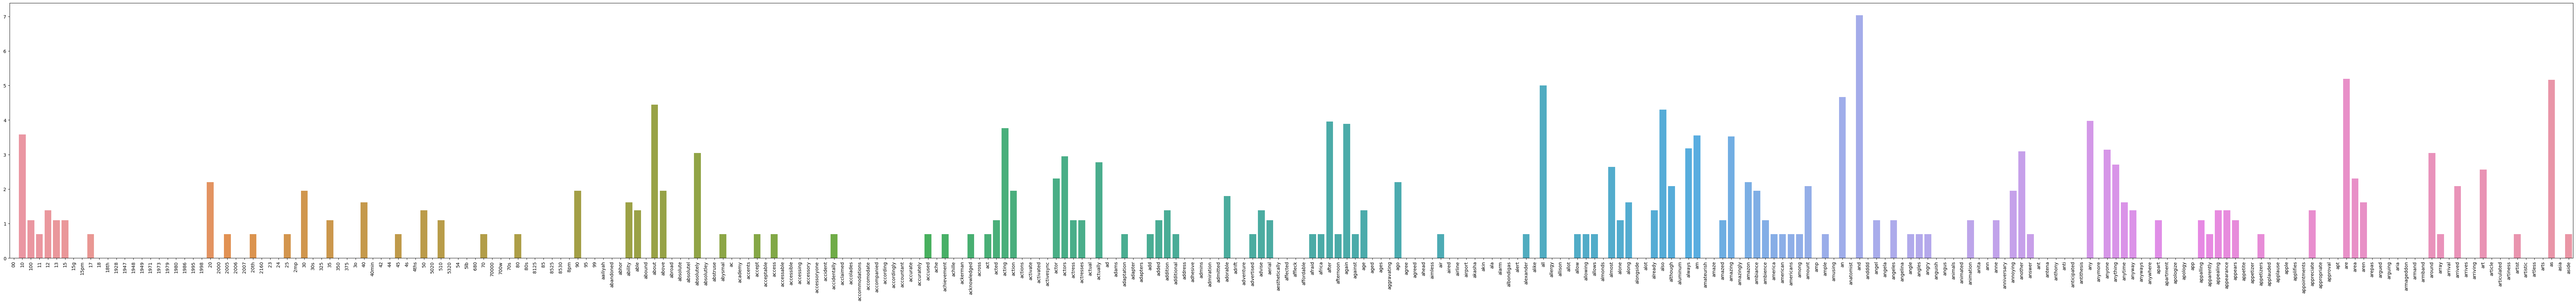

In [30]:
### >>> Data Preprocessing - Attribute Transformation / Aggregation
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Attribute Transformation / Aggregation(5.5) \033[0m")

import math
term_freq_log = [math.log(i) for i in term_freq]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_freq_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

print("\033[1;31m\n>>> This barplot that already transformed the values into the log distribution is more visualiable, rather than the plot above, and we can see more details from this scaling barplot. \033[0m")

In [31]:
### >>> Data Preprocessing - Discretization and Binarization
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Discretization and Binarization(5.6) \033[0m")

mlb = preprocessing.LabelBinarizer() # convert the labels into one-hot encoding

print("\033[1;34m\n* Data with LabelBinarizered [score] \033[0m")
mlb.fit(dropDUP_df.score) # fit LabelBinarizer to "category"
dropDUP_df['bin_score'] = mlb.transform(dropDUP_df['score']).tolist() # add the LabelBinarizered "category" into original data
display(dropDUP_df[0:10])

### >>> Exercise 16 (take home):
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Exercise 16(5.6) \033[0m")

print("\033[1;34m\n* Data with LabelBinarizered [score_name] \033[0m")
mlb.fit(dropDUP_df.score_name) # fit LabelBinarizer to "category_name"
dropDUP_df['bin_score_name'] = mlb.transform(dropDUP_df['score_name']).tolist()
display(dropDUP_df[0:10])

print("\033[1;31m>>> We can see that no matter we process LabelBinarizer on [score] or [score_name], we can obtain the same outputs from the both. \033[0m")
print("\033[1;31m\n>>> According to the information of preprocessing.LabelBinarizer(), we know this function only export 0 and 1. \033[0m")
print("\033[1;31m\n>>> Therefore, since this data originally belongs to binary category, we can find the [LabelBinarizer score] and [LabelBinarizer score_name] are both as same as original [score]. \033[0m")


 Part 2. Discretization and Binarization(5.6) 

* Data with LabelBinarizered [score] 


sentence  score score_name  \
0  So there is no way for me to plug it in here i...      0   negative   
1                        Good case, Excellent value.      1   positive   
2                             Great for the jawbone.      1   positive   
3  Tied to charger for conversations lasting more...      0   negative   
4                                  The mic is great.      1   positive   
5  I have to jiggle the plug to get it to line up...      0   negative   
6  If you have several dozen or several hundred c...      0   negative   
7        If you are Razr owner...you must have this!      1   positive   
8                Needless to say, I wasted my money.      0   negative   
9                   What a waste of money and time!.      0   negative   

                                            unigrams bin_score  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  
1               [Good, case, ,, Excellent, value, .]       [1]  
2                      [Great, for, the, jawbone, .]       [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  
4                           [The, mic, is, great, .]       [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...       [0]  
6  [If, you, have, several, dozen, or, several, h...       [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...       [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]       [0]  
9       [What, a, waste, of, money, and, time, !, .]       [0]


 Part 2. Exercise 16(5.6) 

* Data with LabelBinarizered [score_name] 


sentence  score score_name  \
0  So there is no way for me to plug it in here i...      0   negative   
1                        Good case, Excellent value.      1   positive   
2                             Great for the jawbone.      1   positive   
3  Tied to charger for conversations lasting more...      0   negative   
4                                  The mic is great.      1   positive   
5  I have to jiggle the plug to get it to line up...      0   negative   
6  If you have several dozen or several hundred c...      0   negative   
7        If you are Razr owner...you must have this!      1   positive   
8                Needless to say, I wasted my money.      0   negative   
9                   What a waste of money and time!.      0   negative   

                                            unigrams bin_score bin_score_name  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]            [0]  
1               [Good, case, ,, Excellent, value, .]       [1]            [1]  
2                      [Great, for, the, jawbone, .]       [1]            [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]            [0]  
4                           [The, mic, is, great, .]       [1]            [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...       [0]            [0]  
6  [If, you, have, several, dozen, or, several, h...       [0]            [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...       [1]            [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]       [0]            [0]  
9       [What, a, waste, of, money, and, time, !, .]       [0]            [0]

>>> We can see that no matter we process LabelBinarizer on [score] or [score_name], we can obtain the same outputs from the both. 

>>> According to the information of preprocessing.LabelBinarizer(), we know this function only export 0 and 1. 

>>> Therefore, since this data originally belongs to binary category, we can find the [LabelBinarizer score] and [LabelBinarizer score_name] are both as same as original [score]. 


In [32]:
### >>> Data Exploration
### -----------------------------------------------------
print("\n\033[1;34;43m Part 2. Data Exploration(6) \033[0m")

# retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = dropDUP_df.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = dropDUP_df.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = dropDUP_df.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print("\033[1;34m\n1. \033[0m", document_to_transform_1)
print("\033[1;34m\n2. \033[0m", document_to_transform_2)
print("\033[1;34m\n3. \033[0m", document_to_transform_3)

from sklearn.preprocessing import binarize

# transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("\033[1;34m\n* Count vectors \033[0m")
print("1. ", document_vector_count_1.todense())
print("2. ", document_vector_count_2.todense())
print("3. ", document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity

# calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# print the percentage of similarity
print("\033[1;34m\n* Cosine Similarity using count between \033[0m")
print("1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("\n1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

print("\033[1;31m\n>>> We can find that there is no relationship between two different documents. \033[0m")


 Part 2. Data Exploration(6) 

1.  ["Not loud enough and doesn't turn on like it should."]

2.  ['Integrated seamlessly with the Motorola RAZR phone.']

3.  ['I Was Hoping for More.']

* Count vectors 
1.  [[0 0 0 ... 0 0 0]]
2.  [[0 0 0 ... 0 0 0]]
3.  [[0 0 0 ... 0 0 0]]

* Cosine Similarity using count between 
1 and 2: 0.000000
1 and 3: 0.000000
2 and 3: 0.000000

1 and 1: 1.000000
2 and 2: 1.000000
3 and 3: 1.000000

>>> We can find that there is no relationship between two different documents. 


# Part 3

In [105]:
# call the nltk library
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kristenshen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kristenshen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kristenshen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
# restore the data for the following process
print("\033[1;34m\n* The original DataFrame: \033[0m")
df = dropDUP_df.drop(['unigrams', 'bin_score', 'bin_score_name'], axis=1)
display(df)

# stop-word removal and lemmatization
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

# text pre-processing
import re
preproc = []
for i in range(0, len(df['sentence'])):
    review = re.sub('[^a-zA-Z]', ' ', df['sentence'][i]) # replace single capital or lower letters to blank
    review = review.lower() # transform capital letter into lower case
    review = review.split() # seperate every word into a single project
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)] # take out Lemma of words, i.e., amusing -> amuse
    review = ' '.join(review) # connect every word with a blank 
    preproc.append(review)
    
preproc = pd.DataFrame(preproc) # convert list to DataFrame
preproc_df = df.copy(deep=True) 
preproc_df['sentence'] = preproc # replace original sentences with pre-processed sentences
print("\033[1;34m\n* The pre-processed DataFrame: \033[0m")
display(preproc_df)

print("\033[1;34m\n* original: \033[0m", df.iloc[1, 0])
print("\033[1;34m\n* pre-processing: \033[0m", preproc_df.iloc[1, 0])
print("\033[1;34m\n* original: \033[0m", df.iloc[-1, 0])
print("\033[1;34m\n* pre-processing: \033[0m", preproc_df.iloc[-1, 0])

# split the data to train and test
from sklearn.model_selection import train_test_split
X = preproc_df['sentence']
y = preproc_df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print("\033[1;34m\n* The shape of  \033[0m")
print("\033[1;34m\n X_train \033[0m", X_train.shape)
print("\033[1;34m\n X_test  \033[0m", X_test.shape)
print("\033[1;34m\n y_train \033[0m", y_train.shape)
print("\033[1;34m\n y_test  \033[0m", y_test.shape)


* The original DataFrame: 


sentence  score score_name
0     So there is no way for me to plug it in here i...      0   negative
1                           Good case, Excellent value.      1   positive
2                                Great for the jawbone.      1   positive
3     Tied to charger for conversations lasting more...      0   negative
4                                     The mic is great.      1   positive
...                                                 ...    ...        ...
2978  I think food should have flavor and texture an...      0   negative
2979                           Appetite instantly gone.      0   negative
2980  Overall I was not impressed and would not go b...      0   negative
2981  The whole experience was underwhelming, and I ...      0   negative
2982  Then, as if I hadn't wasted enough of my life ...      0   negative

[2983 rows x 3 columns]


* The pre-processed DataFrame: 


sentence  score score_name
0                        way plug u unless go converter      0   negative
1                             good case excellent value      1   positive
2                                         great jawbone      1   positive
3     tied charger conversation lasting minute major...      0   negative
4                                             mic great      1   positive
...                                                 ...    ...        ...
2978                  think food flavor texture lacking      0   negative
2979                            appetite instantly gone      0   negative
2980                    overall impressed would go back      0   negative
2981  whole experience underwhelming think go ninja ...      0   negative
2982  wasted enough life poured salt wound drawing t...      0   negative

[2983 rows x 3 columns]


* original:  Good case, Excellent value.

* pre-processing:  good case excellent value

* original:  Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.

* pre-processing:  wasted enough life poured salt wound drawing time took bring check

* The shape of  

 X_train  (2088,)

 X_test   (895,)

 y_train  (2088,)

 y_test   (895,)


In [107]:
# import the function of TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()

# apply TF-IDF to train[sentence]
print("\033[1;34m\n* [train] TF-IDF matrix \033[0m")
X_train_tfidf = tfidf_vec.fit_transform(X_train)
X_train_tfidf = tfidf_vec.transform(X_train)
print(X_train_tfidf)

# create DataFrame from TF-IDF matrix
print("\033[1;34m\n* [train] TF-IDF with corresponding word \033[0m")
print("\033[1;31m>>> We can get the TF-IDF values of each word by adding up each column. \033[0m")
tfidf_df = pd.DataFrame({'word': tfidf_vec.get_feature_names_out(),
                        'tfidf': X_train_tfidf.toarray().sum(axis=0).tolist()}) # add up each column for gaining the TF-IDF of each word
display(tfidf_df)

# obtain the vocabulary that is not duplicated
# print(tfidf_vec.get_feature_names_out())

# obtain the ID corresponding to every vocabulary
# print(tfidf_vec.vocabulary_)

print("\033[1;34m\n* The shape of [train] TF-IDF matrix\033[0m\tn_samples: {}, n_features: {}".format(X_train_tfidf.shape[0], X_train_tfidf.shape[1]))

# apply TF-IDF to test[sentence]
print("\033[1;34m\n* [test] TF-IDF matrix \033[0m")
X_test_tfidf = tfidf_vec.transform(X_test)
print(X_test_tfidf)
print("\033[1;34m\n* The shape of [test] TF-IDF matrix\033[0m\tn_samples: {}, n_features: {}".format(X_test_tfidf.shape[0], X_test_tfidf.shape[1]))


* [train] TF-IDF matrix 
  (0, 3712)	0.3491235866860332
  (0, 1877)	0.3772448942749738
  (0, 1048)	0.3438766946783949
  (0, 1029)	0.35492375670628346
  (0, 382)	0.3872818233955185
  (0, 294)	0.4377242685531494
  (0, 166)	0.3872818233955185
  (1, 3727)	0.14342102222592507
  (1, 3628)	0.2253910763380462
  (1, 3260)	0.25390081791856356
  (1, 3142)	0.25390081791856356
  (1, 2970)	0.5078016358371271
  (1, 2958)	0.2442209380010103
  (1, 2882)	0.23057791351987014
  (1, 2879)	0.17123696936034785
  (1, 2742)	0.1825585328430005
  (1, 2185)	0.26754384239970375
  (1, 1393)	0.26754384239970375
  (1, 1106)	0.2442209380010103
  (1, 719)	0.16591307358366122
  (1, 466)	0.25390081791856356
  (1, 243)	0.26754384239970375
  (2, 1457)	0.5105177405736082
  (2, 1318)	0.48448460159260875
  (2, 1255)	0.2429944131912899
  :	:
  (2085, 2570)	0.7402897384570623
  (2085, 1426)	0.6722879614682791
  (2086, 3684)	0.3979507103904153
  (2086, 3646)	0.20536745191149822
  (2086, 3323)	0.1630296033056249
  (2086, 3179)	0

word     tfidf
0      aailiyah  0.365781
1     abandoned  0.196005
2         abhor  0.562032
3       ability  1.185426
4          able  1.515735
...         ...       ...
3770      yummy  1.384992
3771        yun  0.196005
3772       zero  2.408085
3773     zombie  0.632767
3774    zombiez  0.363039

[3775 rows x 2 columns]


* The shape of [train] TF-IDF matrix	n_samples: 2088, n_features: 3775

* [test] TF-IDF matrix 
  (0, 3239)	0.4688258236531274
  (0, 2716)	0.4107602930929901
  (0, 2585)	0.7171214710769263
  (0, 2423)	0.3117934002101277
  (1, 3671)	0.395437034212617
  (1, 3325)	0.6237550397299739
  (1, 1811)	0.554064821135896
  (1, 221)	0.38415020026577623
  (2, 3354)	0.2946513275665468
  (2, 3306)	0.5241602821071558
  (2, 2495)	0.4837466071696812
  (2, 1537)	0.5742171701415749
  (2, 1255)	0.27331384046740476
  (3, 2404)	0.375443443005194
  (3, 1201)	0.6712339837940182
  (3, 1025)	0.6391300025068588
  (4, 3324)	0.8074144587516708
  (4, 1465)	0.5899846538671548
  (5, 2889)	0.639697687235053
  (5, 2531)	0.4283588721143361
  (5, 1439)	0.6381971056241623
  (6, 3354)	0.32462489513516846
  (6, 3324)	0.40958562741770194
  (6, 1936)	0.4671828689590205
  (6, 955)	0.6003696569722957
  :	:
  (891, 2604)	0.5610042659900428
  (891, 1738)	0.5177498554247967
  (891, 1263)	0.46417439637512736
  (892, 3600)	0.44068183

In [109]:
# creat naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

NBclassifier = MultinomialNB()
NBclassifier.fit(X_train_tfidf, y_train)

# get predicted y
y_pred = NBclassifier.predict(X_test_tfidf)

# print the classification report
print("\033[1;34m\n* Classification report \033[0m")
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

# check the confusion matrix
print("\033[1;34m\n* Confusion matrix \033[0m")
print(metrics.confusion_matrix(y_test, y_pred))

# detail the test prediction
print("\033[1;34m\n* Test labels v.s. Predicted labels \033[0m")
y_test = pd.DataFrame(y_test).reset_index(drop=True)
y_pred = pd.DataFrame(y_pred)

test = pd.concat([y_test, y_pred], axis=1, ignore_index = True)
display(test)

acc_num = 0
for i in range(test.shape[0]):
    if test.iloc[i, 0] == test.iloc[i, 1]:
        acc_num += 1

print("\033[1;34m\n* The amount of test data: \033[0m", test.shape[0])
print("\033[1;34m\n* The amount of accuracy data: \033[0m", acc_num)
print("\033[1;31m\n>>> Accuracy = {:.2f}% \033[0m".format((acc_num*100)/test.shape[0]))
print("\033[1;31m\n>>> We can find that the accuracy of the training and testing classifier is not ideal enough, it may need to adjust the approach of pre-processing to improve the performance. \033[0m")


* Classification report 
              precision    recall  f1-score   support

    Positive       0.82      0.77      0.79       449
    Negative       0.78      0.83      0.80       446

    accuracy                           0.80       895
   macro avg       0.80      0.80      0.80       895
weighted avg       0.80      0.80      0.80       895


* Confusion matrix 
[[345 104]
 [ 78 368]]

* Test labels v.s. Predicted labels 


0  1
0    0  1
1    0  0
2    1  1
3    0  1
4    1  1
..  .. ..
890  1  1
891  0  1
892  0  0
893  1  1
894  0  0

[895 rows x 2 columns]


* The amount of test data:  895

* The amount of accuracy data:  713

>>> Accuracy = 79.66% 

>>> We can find that the accuracy of the training and testing classifier is not ideal enough, it may need to adjust the approach of pre-processing to improve the performance. 


# Part 4

I have observed that there are define many variables in the 6. Data Exploration part, I think it may use "for loop" to select every document and create cosine similarity between each other.
Thanks teacher and TAs for explaining every part of homework in details.